In [23]:
import os
import importlib.util

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **FROM 1981-02-25 -- 1988-12-13**

#### **Loading and Preparing Data for APPLE STOCK**

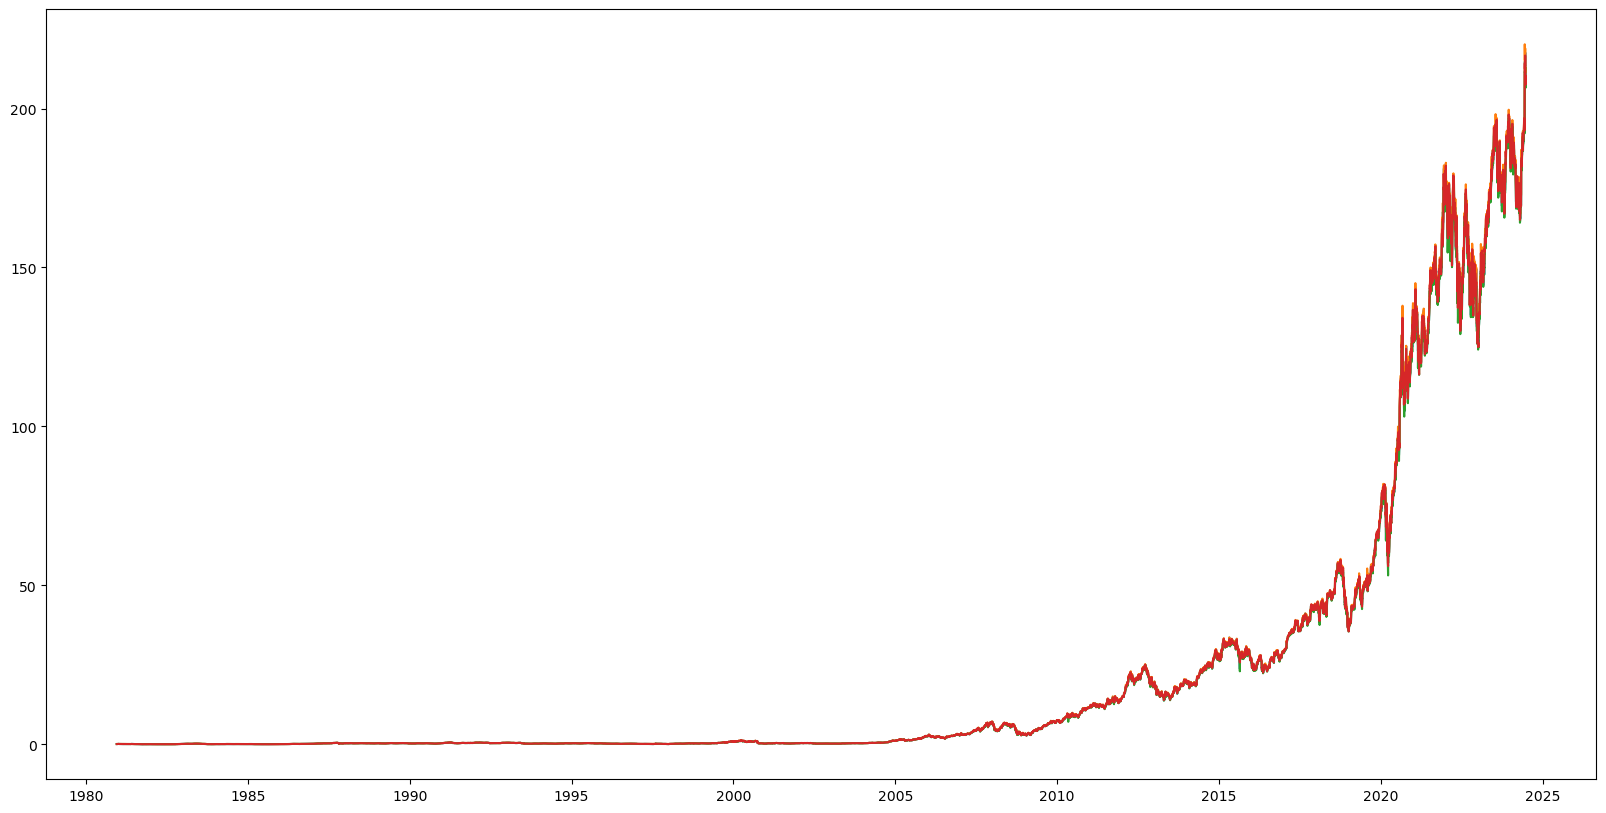

In [24]:
import pandas as pd

file_path = os.path.join(config.BASE_DIR, 'dataset', 'AAPL.csv')
df = pd.read_csv(file_path)
df = df[['Date', 'Open', 'High', 'Low', 'Close']]

# to convert date from string to datetime
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)

df.index = df.pop('Date')
# Assuming df is your DataFrame
df.dropna(axis=0, inplace=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [51]:
## WINDOW FUNCTION
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1981-02-25', 
                                '1988-12-13', 
                                n=50)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3157402260.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3157402260.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3157402260.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Target Date   Open-50   High-50    Low-50  Close-50   Open-49   High-49  \
0     1981-02-25  0.128348  0.128906  0.128348  0.128348  0.122210  0.122210   
1     1981-02-26  0.122210  0.122210  0.121652  0.121652  0.113281  0.113281   
2     1981-02-27  0.113281  0.113281  0.112723  0.112723  0.115513  0.116071   
3     1981-03-02  0.115513  0.116071  0.115513  0.115513  0.118862  0.119420   
4     1981-03-03  0.118862  0.119420  0.118862  0.118862  0.126116  0.126674   
...          ...       ...       ...       ...       ...       ...       ...   
1969  1988-12-07  0.379464  0.388393  0.379464  0.387277  0.388393  0.393973   
1970  1988-12-08  0.388393  0.393973  0.386161  0.388393  0.390625  0.395089   
1971  1988-12-09  0.390625  0.395089  0.388393  0.392857  0.392857  0.392857   
1972  1988-12-12  0.392857  0.392857  0.386161  0.386161  0.383929  0.386161   
1973  1988-12-13  0.383929  0.386161  0.375000  0.379464  0.377232  0.381696   

        Low-49  Close-49   Open-48  ...     Low-2   Close-2    Open-1  \
0     0.121652  0.121652  0.113281  ...  0.109933  0.109933  0.107143   
1     0.112723  0.112723  0.115513  ...  0.106027  0.106027  0.112723   
2     0.115513  0.115513  0.118862  ...  0.112723  0.112723  0.114397   
3     0.118862  0.118862  0.126116  ...  0.114397  0.114397  0.118304   
4     0.126116  0.126116  0.132254  ...  0.118304  0.118304  0.118862   
...        ...       ...       ...  ...       ...       ...       ...   
1969  0.386161  0.388393  0.390625  ...  0.345982  0.352679  0.350446   
1970  0.388393  0.392857  0.392857  ...  0.348214  0.352679  0.348214   
1971  0.386161  0.386161  0.383929  ...  0.345982  0.351563  0.350446   
1972  0.375000  0.379464  0.377232  ...  0.345982  0.349330  0.350446   
1973  0.367188  0.370536  0.368304  ...  0.345982  0.349330  0.350446   

        High-1     Low-1   Close-1  Open-Target  High-Target  Low-Target  \
0     0.107143  0.106027  0.106027     0.112723     0.113281    0.112723   
1     0.113281  0.112723  0.112723     0.114397     0.114955    0.114397   
2     0.114955  0.114397  0.114397     0.118304     0.119420    0.118304   
3     0.119420  0.118304  0.118304     0.118862     0.119420    0.118862   
4     0.119420  0.118862  0.118862     0.117746     0.117746    0.117188   
...        ...       ...       ...          ...          ...         ...   
1969  0.354911  0.348214  0.352679     0.348214     0.352679    0.345982   
1970  0.352679  0.345982  0.351563     0.350446     0.350446    0.345982   
1971  0.350446  0.345982  0.349330     0.350446     0.352679    0.345982   
1972  0.352679  0.345982  0.349330     0.350446     0.352679    0.343750   
1973  0.352679  0.343750  0.343750     0.343750     0.345982    0.341518   

      Close-Target  
0         0.112723  
1         0.114397  
2         0.118304  
3         0.118862  
4         0.117188  
...            ...  
1969      0.351563  
1970      0.349330  
1971      0.349330  
1972      0.343750  
1973      0.345982  

[1974 rows x 205 columns]

In [52]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1974,), (1974, 50, 4), (1974, 4))

(1579,) (1579, 50, 4) (1579, 4)
(198,) (198, 50, 4) (198, 4)
(198,) (198, 50, 4) (198, 4)


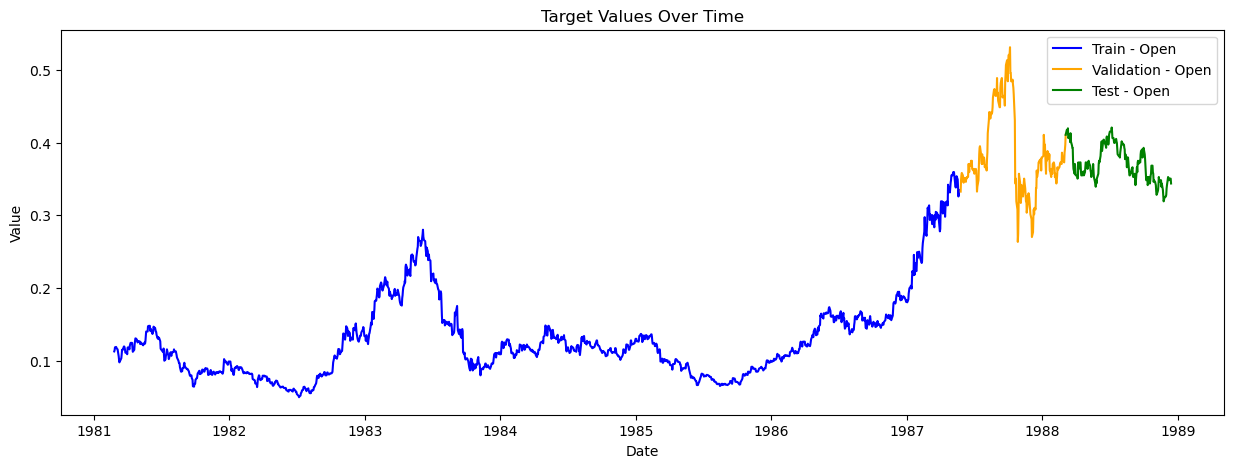

In [27]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90+1], X[q_80:q_90+1], y[q_80:q_90+1]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

print(dates_train.shape, X_train.shape, y_train.shape)
print(dates_val.shape, X_val.shape, y_val.shape)
print(dates_test.shape, X_test.shape, y_test.shape)

plt.figure(figsize=(15, 5))

# Plotting target values for each feature set
plt.plot(dates_train, y_train[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val, y_val[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test, y_test[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

#### **INFY model on APPLE stock**

In [ ]:
import pickle

pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.h5')

def load_model_from_pickle(pickle_file_path_lstm_v2):
    with open(pickle_file_path_lstm_v2, 'rb') as f:
        infy_model = pickle.load(f)
    return infy_model

# Load model from pickle file
infy_model = load_model_from_pickle(pickle_file_path_lstm_v2)

In [ ]:
infymodel_apple_predictions = infy_model.predict(X_test)
infymodel_apple_predictions

##### **test start date: 2018-04-20   |    test end date: 2021-12-31**

In [ ]:
# Plotting graph between predictions vs actual
# test start date: 2018-04-20       test end date: 2021-12-31
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(15, 11))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test, infymodel_apple_predictions[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test, y_test[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
print(dates_train, '\n')
print(dates_val, '\n')
print(dates_test)

In [ ]:
'''
dates_train: 1985-01-02 -- 2010-09-03
dates_val: 2010-09-07 -- 2010-11-03
dates_test: 2017-02-01 -- 2017-02-10
'''

#### **(AAPL) Apple Stock Price Model Training! | FROM - [1985-01-02 -- 2010-09-03]**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0099 - mean_absolute_error: 0.0820 - val_loss: 0.0051 - val_mean_absolute_error: 0.0648
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 3.4525e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0016 - val_mean_absolute_error: 0.0274
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 1.7074e-04 - mean_absolute_error: 0.0101 - val_loss: 0.0026 - val_mean_absolute_error: 0.0340
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 1.2698e-04 - mean_absolute_error: 0.0084 - val_loss: 0.0027 - val_mean_absolute_error: 0.0359
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 1.1525e-04 - mean_absolute_error: 0.0078 - val_loss: 0.0023 - val_mean_absolute_error: 0.0321
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 1.1828e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0016 - val_mean_absolute_error: 0.0241
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 9.9752e-0

In [29]:
all_testdata_prediction = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [30]:
all_testdata_prediction

array([[0.4003916 , 0.40674084, 0.39501965, 0.3979425 ],
       [0.40915444, 0.41642573, 0.40445295, 0.4064838 ],
       [0.41612434, 0.424235  , 0.41204527, 0.4137215 ],
       [0.41861242, 0.4261046 , 0.41428688, 0.41724032],
       [0.4201689 , 0.42717752, 0.41561672, 0.41941828],
       [0.4177243 , 0.42447984, 0.41291678, 0.41786304],
       [0.41269472, 0.41911215, 0.4077292 , 0.41318938],
       [0.41197893, 0.41815877, 0.40686145, 0.41220888],
       [0.40884674, 0.41476035, 0.40356478, 0.4090475 ],
       [0.40760082, 0.4133095 , 0.40206948, 0.407326  ],
       [0.40684304, 0.41242135, 0.40124616, 0.4062885 ],
       [0.40350145, 0.40881377, 0.39775097, 0.4028287 ],
       [0.39764556, 0.40264907, 0.39166895, 0.3969383 ],
       [0.39419717, 0.3989535 , 0.38803002, 0.39312363],
       [0.38838682, 0.39290747, 0.38201886, 0.3872172 ],
       [0.37748948, 0.38159856, 0.37069198, 0.3764643 ],
       [0.36738762, 0.3714064 , 0.3607963 , 0.3663318 ],
       [0.36327547, 0.36737227,

In [ ]:
## divide the test data into chunks of 30 days
'''
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

print(dates_train.shape, X_train.shape, y_train.shape)      (7461,) (7461, 50, 4) (7461, 4)
print(dates_val.shape, X_val.shape, y_val.shape)            (933,) (933, 50, 4) (933, 4)
print(dates_test.shape, X_test.shape, y_test.shape)         (933,) (933, 50, 4) (933, 4)
'''

In [31]:
dates_test

array([Timestamp('1988-03-04 00:00:00'), Timestamp('1988-03-07 00:00:00'),
       Timestamp('1988-03-08 00:00:00'), Timestamp('1988-03-09 00:00:00'),
       Timestamp('1988-03-10 00:00:00'), Timestamp('1988-03-11 00:00:00'),
       Timestamp('1988-03-14 00:00:00'), Timestamp('1988-03-15 00:00:00'),
       Timestamp('1988-03-16 00:00:00'), Timestamp('1988-03-17 00:00:00'),
       Timestamp('1988-03-18 00:00:00'), Timestamp('1988-03-21 00:00:00'),
       Timestamp('1988-03-22 00:00:00'), Timestamp('1988-03-23 00:00:00'),
       Timestamp('1988-03-24 00:00:00'), Timestamp('1988-03-25 00:00:00'),
       Timestamp('1988-03-28 00:00:00'), Timestamp('1988-03-29 00:00:00'),
       Timestamp('1988-03-30 00:00:00'), Timestamp('1988-03-31 00:00:00'),
       Timestamp('1988-04-04 00:00:00'), Timestamp('1988-04-05 00:00:00'),
       Timestamp('1988-04-06 00:00:00'), Timestamp('1988-04-07 00:00:00'),
       Timestamp('1988-04-08 00:00:00'), Timestamp('1988-04-11 00:00:00'),
       Timestamp('1988-04

##### **Checking and Predicting on all Test data**

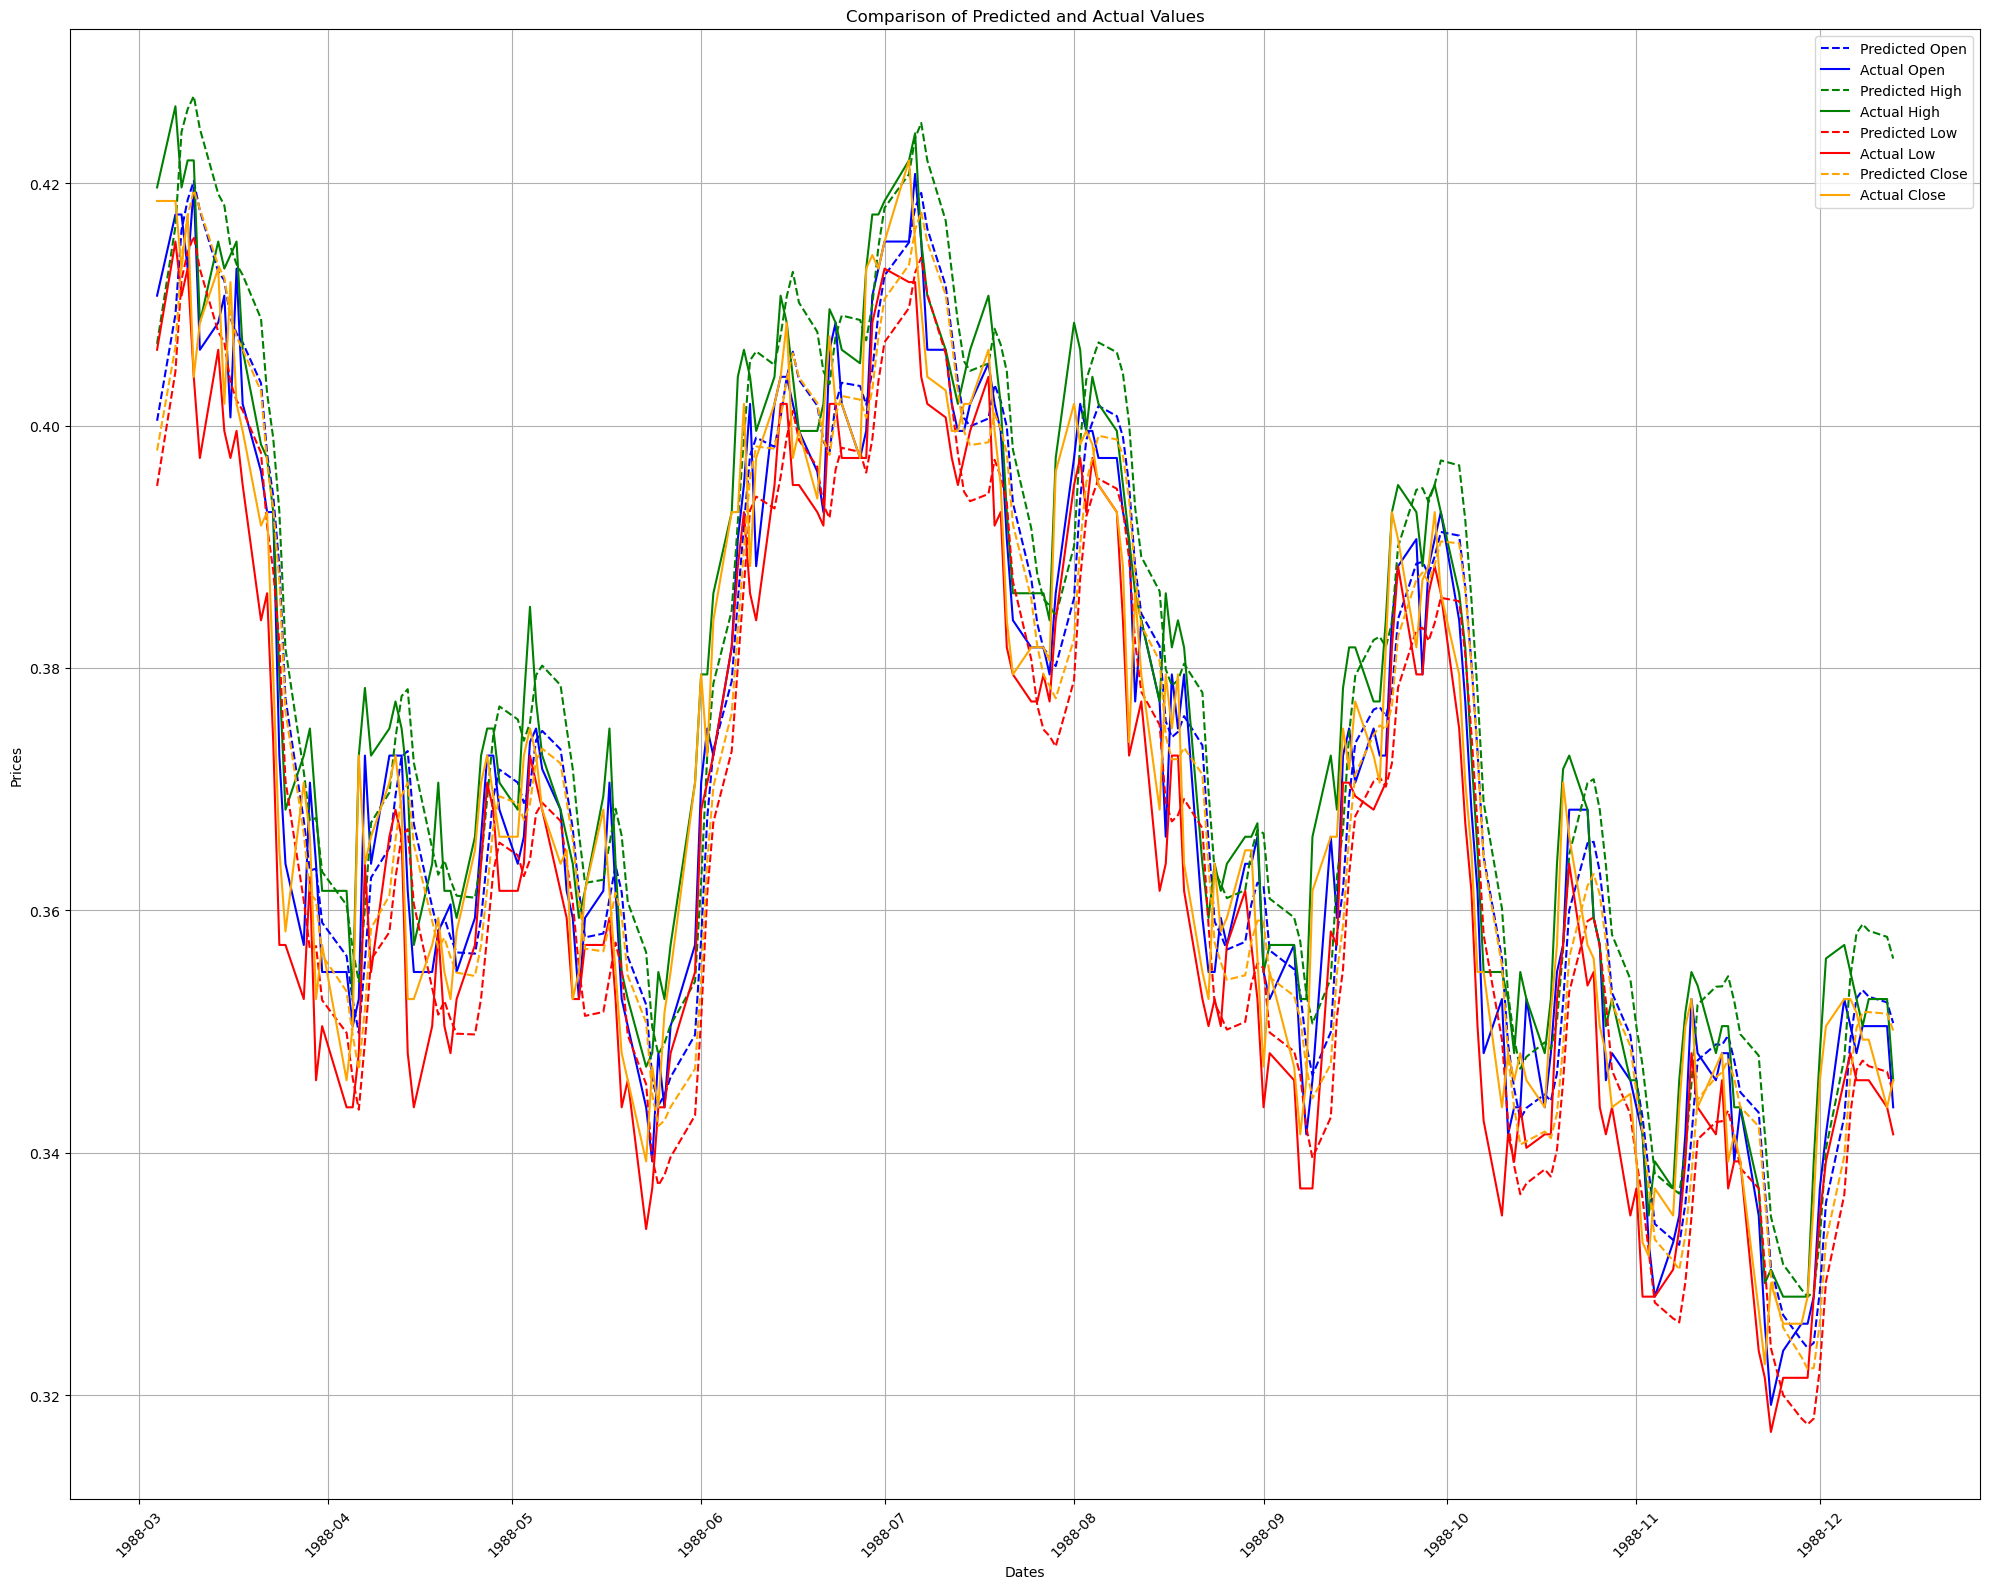

In [32]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test, all_testdata_prediction[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test, y_test[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

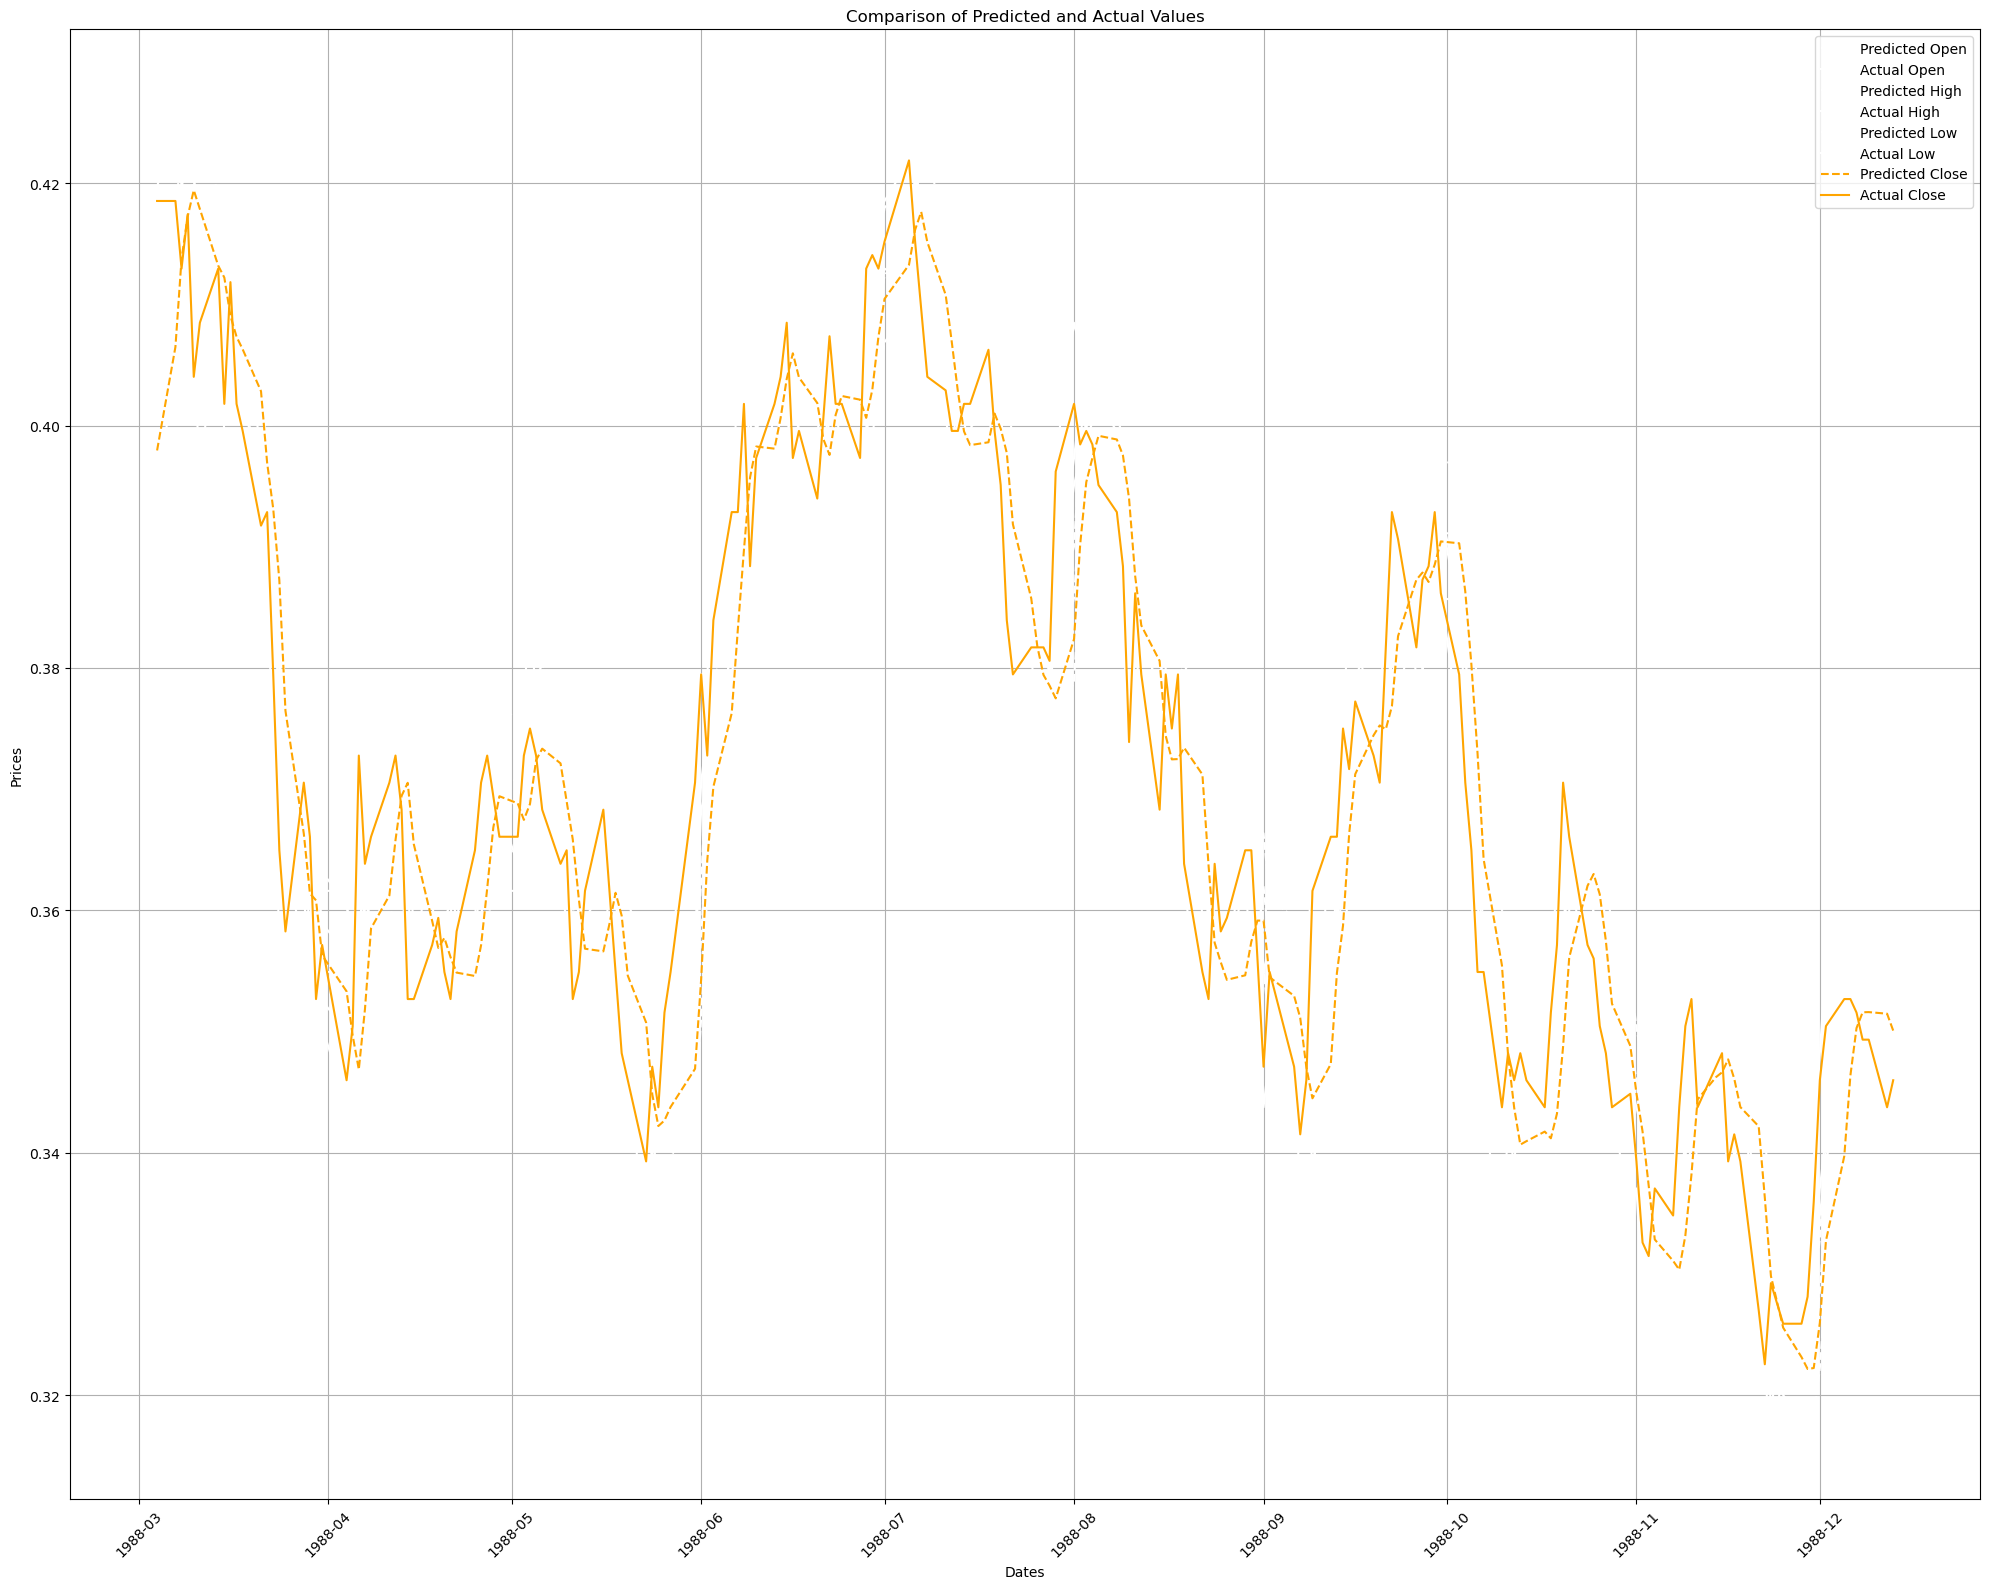

In [33]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test, all_testdata_prediction[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test, y_test[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### **FROM 2008-09-08 -- 2016-07-11**

In [34]:
## WINDOW FUNCTION
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2008-09-08', 
                                '2016-07-11', 
                                n=50)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1854156715.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1854156715.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1854156715.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Target Date    Open-50    High-50     Low-50   Close-50    Open-49  \
0     2008-09-08   6.216786   6.244286   6.000357   6.009286   5.946786   
1     2008-09-09   5.946786   6.091786   5.862500   6.074643   6.078214   
2     2008-09-10   6.078214   6.142857   5.950714   5.980000   5.865357   
3     2008-09-11   5.865357   6.240000   5.857143   6.238571   6.257143   
4     2008-09-12   6.257143   6.337500   6.006429   6.006429   6.056786   
...          ...        ...        ...        ...        ...        ...   
1969  2016-07-05  26.252501  26.620001  26.155001  26.420000  26.250000   
1970  2016-07-06  26.250000  26.412500  26.127501  26.270000  25.977501   
1971  2016-07-07  25.977501  26.325001  25.977501  26.087500  24.000000   
1972  2016-07-08  24.000000  24.677500  23.920000  24.455000  24.402500   
1973  2016-07-11  24.402500  24.469999  23.562500  23.707500  23.497499   

        High-49     Low-49   Close-49    Open-48  ...      Low-2    Close-2  \
0      6.091786   5.862500   6.074643   6.078214  ...   5.743214   5.757857   
1      6.142857   5.950714   5.980000   5.865357  ...   5.630357   5.720714   
2      6.240000   5.857143   6.238571   6.257143  ...   5.409286   5.640000   
3      6.337500   6.006429   6.006429   6.056786  ...   5.349643   5.417143   
4      6.148929   5.919643   6.075714   6.184286  ...   5.314286   5.414643   
...         ...        ...        ...        ...  ...        ...        ...   
1969  26.412500  26.127501  26.270000  25.977501  ...  23.575001  23.900000   
1970  26.325001  25.977501  26.087500  24.000000  ...  23.832500  23.972500   
1971  24.677500  23.920000  24.455000  24.402500  ...  23.615000  23.747499   
1972  24.469999  23.562500  23.707500  23.497499  ...  23.592501  23.882500   
1973  23.680000  23.127501  23.434999  23.492500  ...  23.905001  23.985001   

         Open-1     High-1      Low-1    Close-1  Open-Target  High-Target  \
0      5.663929   5.800000   5.630357   5.720714     5.877500     5.888929   
1      5.877500   5.888929   5.409286   5.640000     5.602143     5.712857   
2      5.602143   5.712857   5.349643   5.417143     5.440000     5.535357   
3      5.440000   5.535357   5.314286   5.414643     5.292143     5.463929   
4      5.292143   5.463929   5.214286   5.451786     5.389643     5.389643   
...         ...        ...        ...        ...          ...          ...   
1969  23.872499  24.117500  23.832500  23.972500    23.847500    23.850000   
1970  23.847500  23.850000  23.615000  23.747499    23.650000    23.915001   
1971  23.650000  23.915001  23.592501  23.882500    23.924999    24.125000   
1972  23.924999  24.125000  23.905001  23.985001    24.122499    24.222500   
1973  24.122499  24.222500  24.012501  24.170000    24.187500    24.412500   

      Low-Target  Close-Target  
0       5.409286      5.640000  
1       5.349643      5.417143  
2       5.314286      5.414643  
3       5.214286      5.451786  
4       5.232143      5.319286  
...          ...           ...  
1969   23.615000     23.747499  
1970   23.592501     23.882500  
1971   23.905001     23.985001  
1972   24.012501     24.170000  
1973   24.182501     24.245001  

[1974 rows x 205 columns]

In [35]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1974,), (1974, 50, 4), (1974, 4))

(1579,) (1579, 50, 4) (1579, 4)
(198,) (198, 50, 4) (198, 4)
(198,) (198, 50, 4) (198, 4)


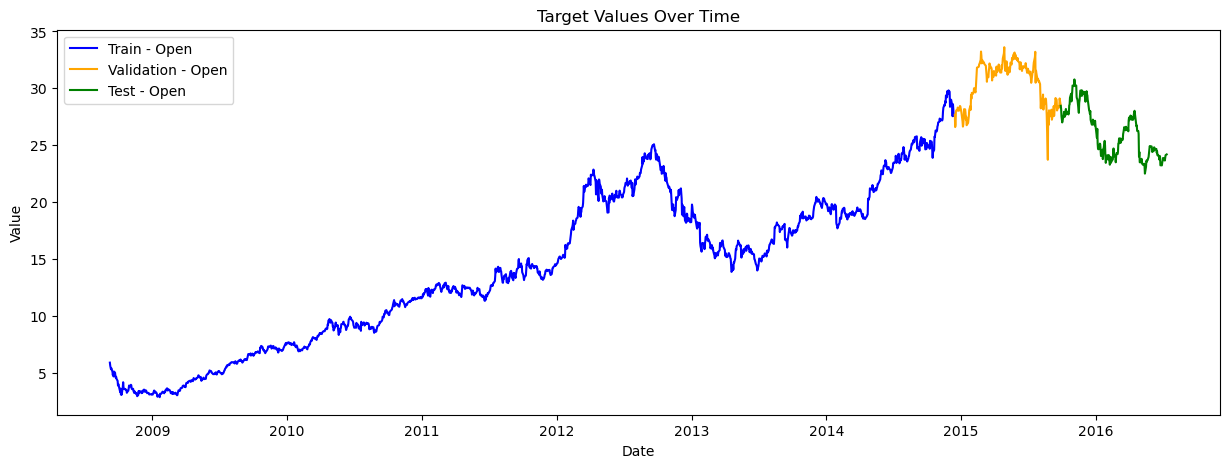

In [36]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train1, X_train1, y_train1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val1, X_val1, y_val1 = dates[q_80:q_90+1], X[q_80:q_90+1], y[q_80:q_90+1]
dates_test1, X_test1, y_test1 = dates[q_90:], X[q_90:], y[q_90:]

print(dates_train1.shape, X_train1.shape, y_train1.shape)
print(dates_val1.shape, X_val1.shape, y_val1.shape)
print(dates_test1.shape, X_test1.shape, y_test1.shape)

plt.figure(figsize=(15, 5))

# Plotting target values for each feature set
plt.plot(dates_train1, y_train1[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val1, y_val1[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test1, y_test1[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model_1 = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model_1.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model_1.fit(X_train1, y_train1, 
          validation_data=(X_val1, y_val1), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 228.4964 - mean_absolute_error: 13.5798 - val_loss: 837.2451 - val_mean_absolute_error: 28.8507
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 181.2993 - mean_absolute_error: 11.6314 - val_loss: 670.4550 - val_mean_absolute_error: 25.7180
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 110.8488 - mean_absolute_error: 8.3719 - val_loss: 436.7904 - val_mean_absolute_error: 20.6736
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 47.0250 - mean_absolute_error: 4.7484 - val_loss: 259.5082 - val_mean_absolute_error: 15.8975
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 17.4415 - mean_absolute_error: 2.4820 - val_loss: 160.9847 - val_mean_absolute_error: 12.4793
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 6.4962 - mean_absolute_error: 1.3345 - val_loss: 107.7373 - val_mean_absolute_error: 10.1559
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 2.3

In [38]:
all_testdata_prediction_1 = model_1.predict(X_test1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [39]:
all_testdata_prediction_1

array([[28.83868 , 29.142277, 28.672396, 28.92477 ],
       [28.720476, 29.044363, 28.588362, 28.829136],
       [28.397512, 28.764557, 28.368055, 28.574352],
       [28.17806 , 28.57093 , 28.209953, 28.408674],
       [27.921934, 28.343336, 28.022812, 28.208363],
       [27.837729, 28.256083, 27.942598, 28.136944],
       [27.905207, 28.321512, 28.002245, 28.21008 ],
       [28.00846 , 28.41387 , 28.076752, 28.297537],
       [28.063194, 28.46437 , 28.120378, 28.340748],
       [27.936253, 28.355515, 28.031382, 28.238588],
       [28.055063, 28.456114, 28.11023 , 28.334423],
       [28.211813, 28.59498 , 28.22486 , 28.456684],
       [28.22423 , 28.60686 , 28.232607, 28.465328],
       [28.129793, 28.528149, 28.169386, 28.391874],
       [28.174265, 28.56538 , 28.198057, 28.42686 ],
       [28.183092, 28.574753, 28.206533, 28.434212],
       [28.175821, 28.568237, 28.200045, 28.42865 ],
       [28.327501, 28.69539 , 28.304129, 28.543686],
       [28.543175, 28.88315 , 28.455389, 28.70

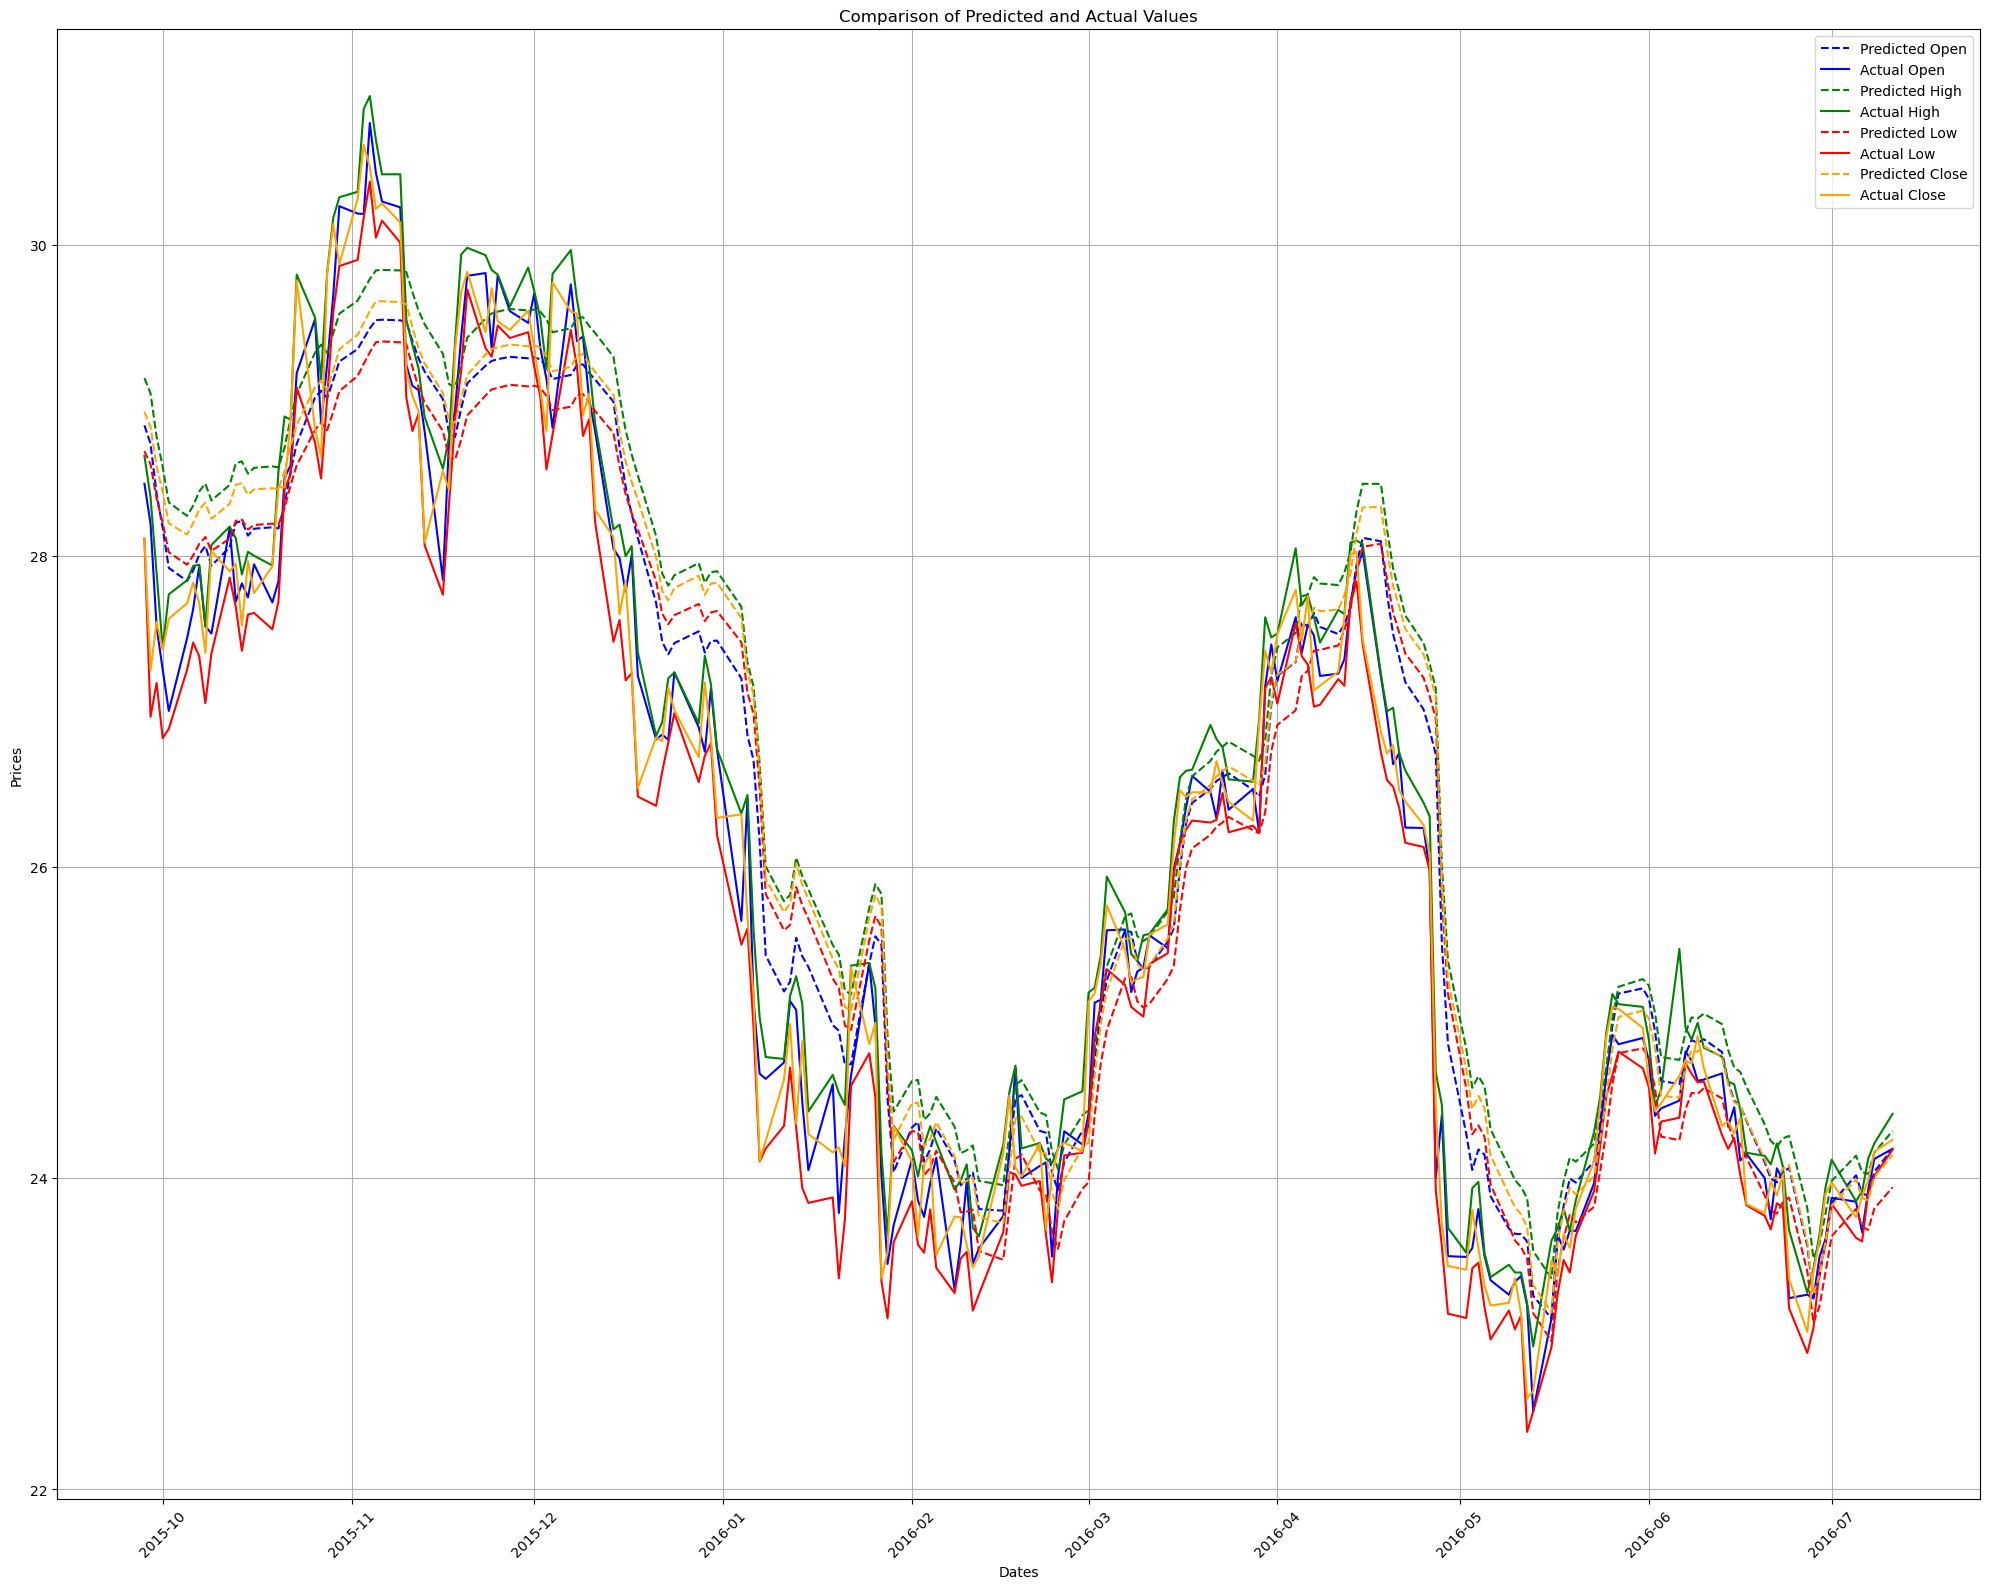

In [40]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test1, all_testdata_prediction_1[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test1, y_test1[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

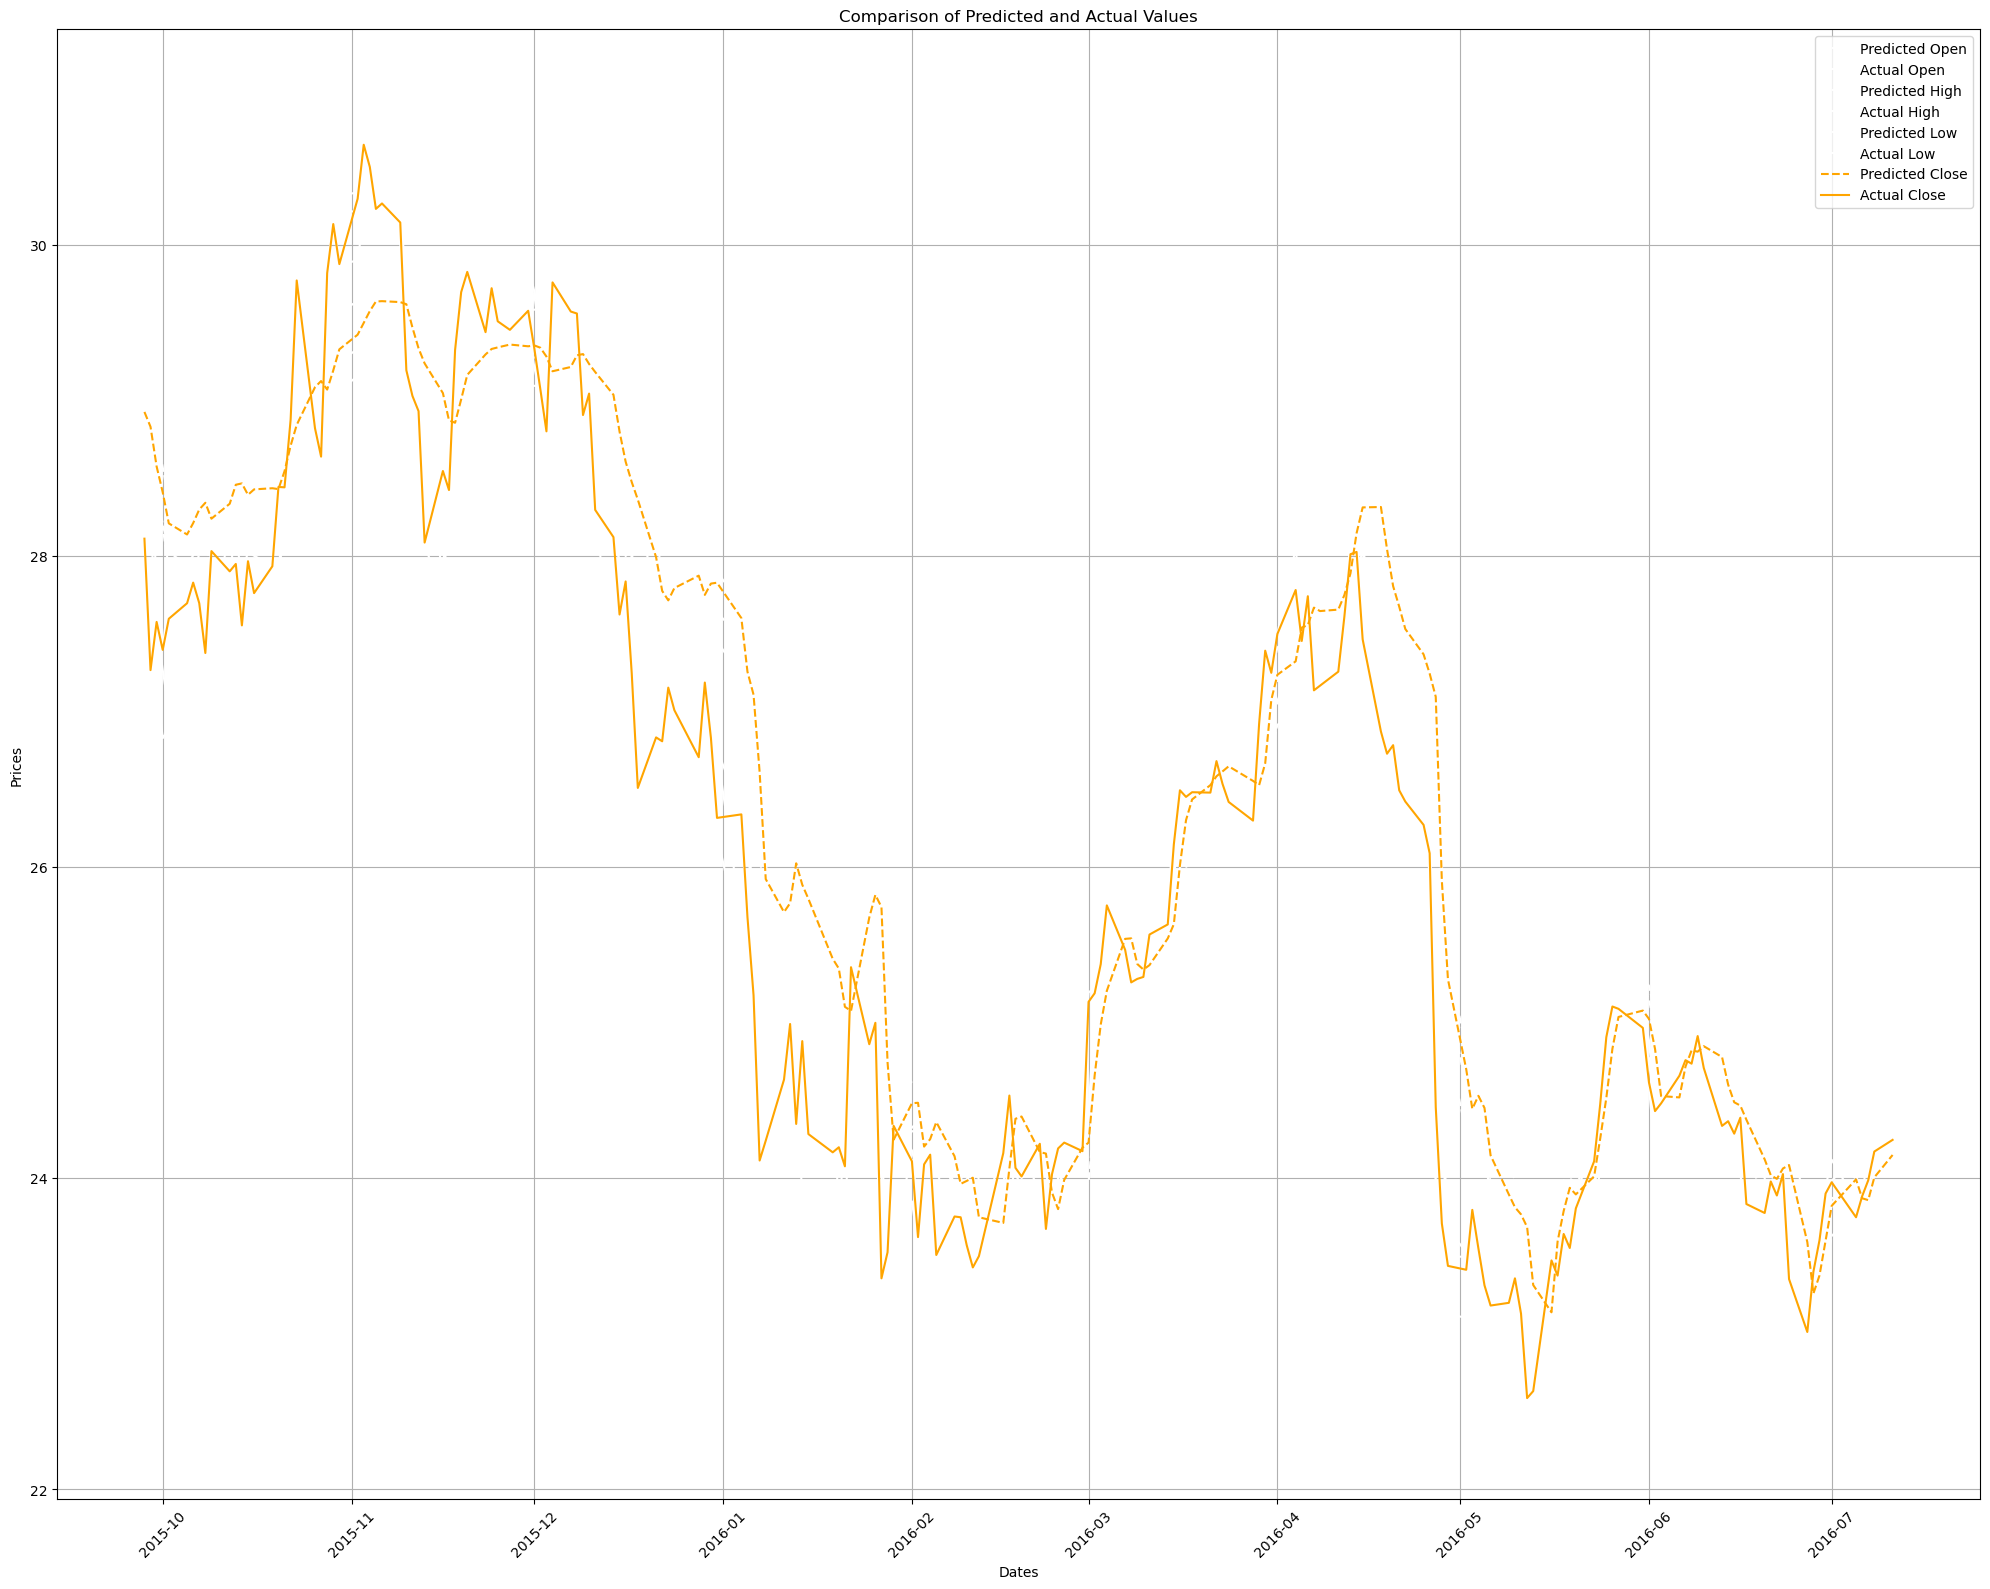

In [41]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test1, all_testdata_prediction_1[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test1, y_test1[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### **FROM 1990-01-02 -- 2006-12-29**

In [126]:
## WINDOW FUNCTION
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: 1990-01-02 -- 2006-12-29
windowed_df = df_to_windowed_df(df, 
                                '1990-01-02', 
                                '2006-12-29', 
                                n=50)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1229028715.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1229028715.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\1229028715.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Target Date   Open-50   High-50    Low-50  Close-50   Open-49   High-49  \
0     1990-01-02  0.430804  0.441964  0.430804  0.435268  0.426339  0.439732   
1     1990-01-03  0.426339  0.439732  0.424107  0.428571  0.428571  0.430804   
2     1990-01-04  0.428571  0.430804  0.412946  0.417411  0.412946  0.433036   
3     1990-01-05  0.412946  0.433036  0.404018  0.425223  0.426339  0.426339   
4     1990-01-08  0.426339  0.426339  0.412946  0.415179  0.406250  0.415179   
...          ...       ...       ...       ...       ...       ...       ...   
4282  2006-12-22  2.628929  2.692500  2.628571  2.687857  2.701071  2.745714   
4283  2006-12-26  2.701071  2.745714  2.669286  2.679286  2.685357  2.710000   
4284  2006-12-27  2.685357  2.710000  2.671071  2.692857  2.680000  2.688214   
4285  2006-12-28  2.680000  2.688214  2.644286  2.653214  2.669643  2.691786   
4286  2006-12-29  2.669643  2.691786  2.639643  2.661786  2.830714  2.855357   

        Low-49  Close-49   Open-48  ...     Low-2   Close-2    Open-1  \
0     0.424107  0.428571  0.428571  ...  0.305804  0.309152  0.310268   
1     0.412946  0.417411  0.412946  ...  0.306920  0.314732  0.314732   
2     0.404018  0.425223  0.426339  ...  0.312500  0.332589  0.339286   
3     0.412946  0.415179  0.406250  ...  0.334821  0.334821  0.341518   
4     0.401786  0.404018  0.404018  ...  0.332589  0.335938  0.337054   
...        ...       ...       ...  ...       ...       ...       ...   
4282  2.669286  2.679286  2.685357  ...  3.026429  3.027143  3.025000   
4283  2.671071  2.692857  2.680000  ...  2.935714  2.960714  2.980714   
4284  2.644286  2.653214  2.669643  ...  2.914286  2.935714  2.933929   
4285  2.639643  2.661786  2.830714  ...  2.888929  2.911071  2.791071   
4286  2.791429  2.821071  2.820357  ...  2.741786  2.911429  2.865000   

        High-1     Low-1   Close-1  Open-Target  High-Target  Low-Target  \
0     0.319196  0.306920  0.314732     0.314732     0.334821    0.312500   
1     0.334821  0.312500  0.332589     0.339286     0.339286    0.334821   
2     0.339286  0.334821  0.334821     0.341518     0.345982    0.332589   
3     0.345982  0.332589  0.335938     0.337054     0.341518    0.330357   
4     0.341518  0.330357  0.337054     0.334821     0.339286    0.330357   
...        ...       ...       ...          ...          ...         ...   
4282  3.052857  2.935714  2.960714     2.980714     3.001429    2.914286   
4283  3.001429  2.914286  2.935714     2.933929     2.948929    2.888929   
4284  2.948929  2.888929  2.911071     2.791071     2.928571    2.741786   
4285  2.928571  2.741786  2.911429     2.865000     2.901786    2.844643   
4286  2.901786  2.844643  2.888214     2.998214     3.050000    2.977143   

      Close-Target  
0         0.332589  
1         0.334821  
2         0.335938  
3         0.337054  
4         0.339286  
...            ...  
4282      2.935714  
4283      2.911071  
4284      2.911429  
4285      2.888214  
4286      3.030000  

[4287 rows x 205 columns]

In [127]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((4287,), (4287, 50, 4), (4287, 4))

(3429,) (3429, 50, 4) (3429, 4)
(430,) (430, 50, 4) (430, 4)
(429,) (429, 50, 4) (429, 4)


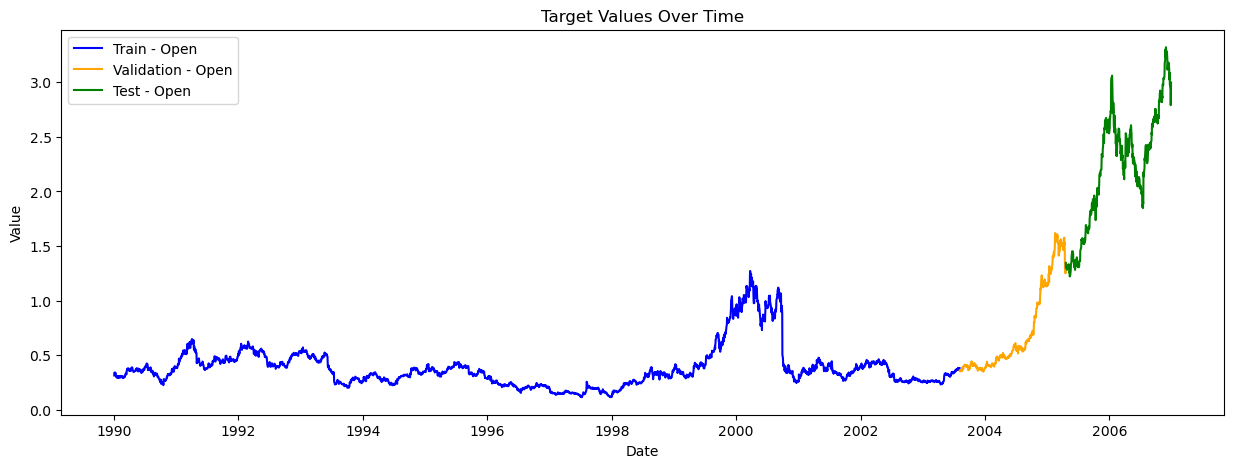

In [128]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train3, X_train3, y_train3 = dates[:q_80], X[:q_80], y[:q_80]
dates_val3, X_val3, y_val3 = dates[q_80:q_90+1], X[q_80:q_90+1], y[q_80:q_90+1]
dates_test3, X_test3, y_test3 = dates[q_90:], X[q_90:], y[q_90:]

print(dates_train3.shape, X_train3.shape, y_train3.shape)
print(dates_val3.shape, X_val3.shape, y_val3.shape)
print(dates_test3.shape, X_test3.shape, y_test3.shape)

plt.figure(figsize=(15, 5))

# Plotting target values for each feature set
plt.plot(dates_train3, y_train3[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val3, y_val3[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test3, y_test3[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model_3 = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model_3.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model_3.fit(X_train3, y_train3, 
          validation_data=(X_val3, y_val3), 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - loss: 0.0764 - mean_absolute_error: 0.2020 - val_loss: 0.0086 - val_mean_absolute_error: 0.0583
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 0.0014 - mean_absolute_error: 0.0242 - val_loss: 0.0051 - val_mean_absolute_error: 0.0453
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - loss: 0.0013 - mean_absolute_error: 0.0224 - val_loss: 0.0037 - val_mean_absolute_error: 0.0397
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - loss: 0.0011 - mean_absolute_error: 0.0209 - val_loss: 0.0024 - val_mean_absolute_error: 0.0332
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - loss: 0.0012 - mean_absolute_error: 0.0210 - val_loss: 0.0023 - val_mean_absolute_error: 0.0315
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - loss: 8.9663e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0021 - val_mean_absolute_error: 0.0299
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - loss: 8.5917e-

In [130]:
all_testdata_prediction_3 = model_3.predict(X_test3)
all_testdata_prediction_3

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


array([[1.2695863, 1.3065711, 1.2285346, 1.2847148],
       [1.2553892, 1.290737 , 1.2144519, 1.2658355],
       [1.2573706, 1.2912462, 1.2148274, 1.2603532],
       ...,
       [2.7298586, 2.6766102, 2.6404622, 2.6363666],
       [2.684594 , 2.6275907, 2.5975983, 2.5998216],
       [2.665306 , 2.6070046, 2.5756977, 2.5799975]], dtype=float32)

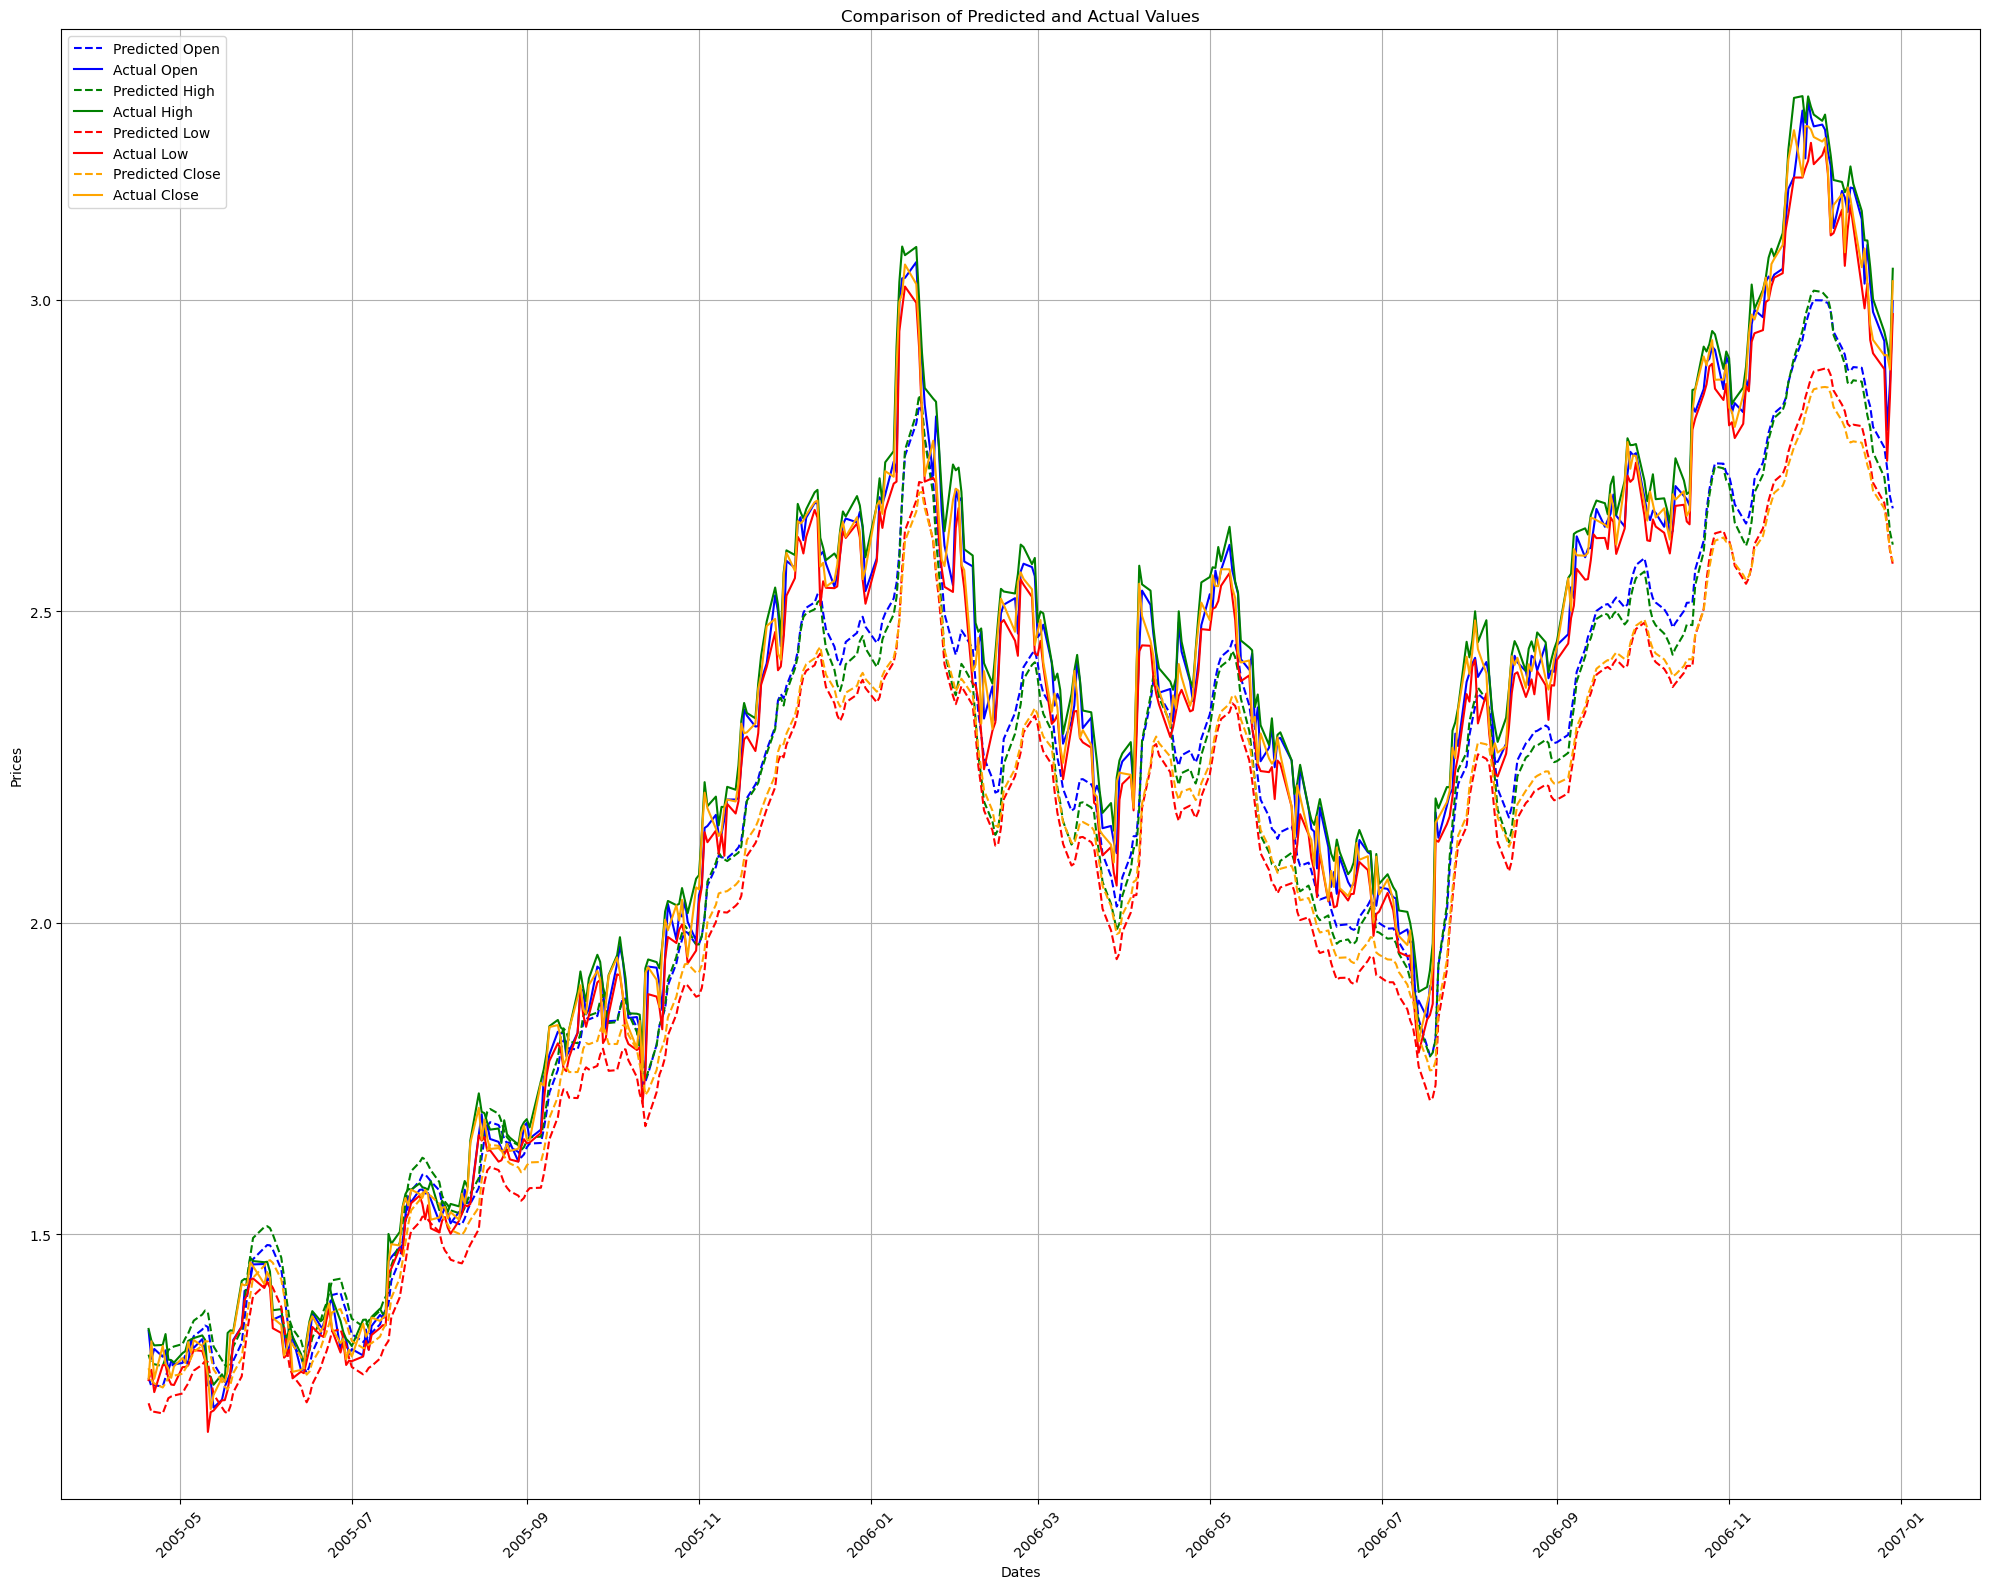

In [131]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test3, all_testdata_prediction_3[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test3, y_test3[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

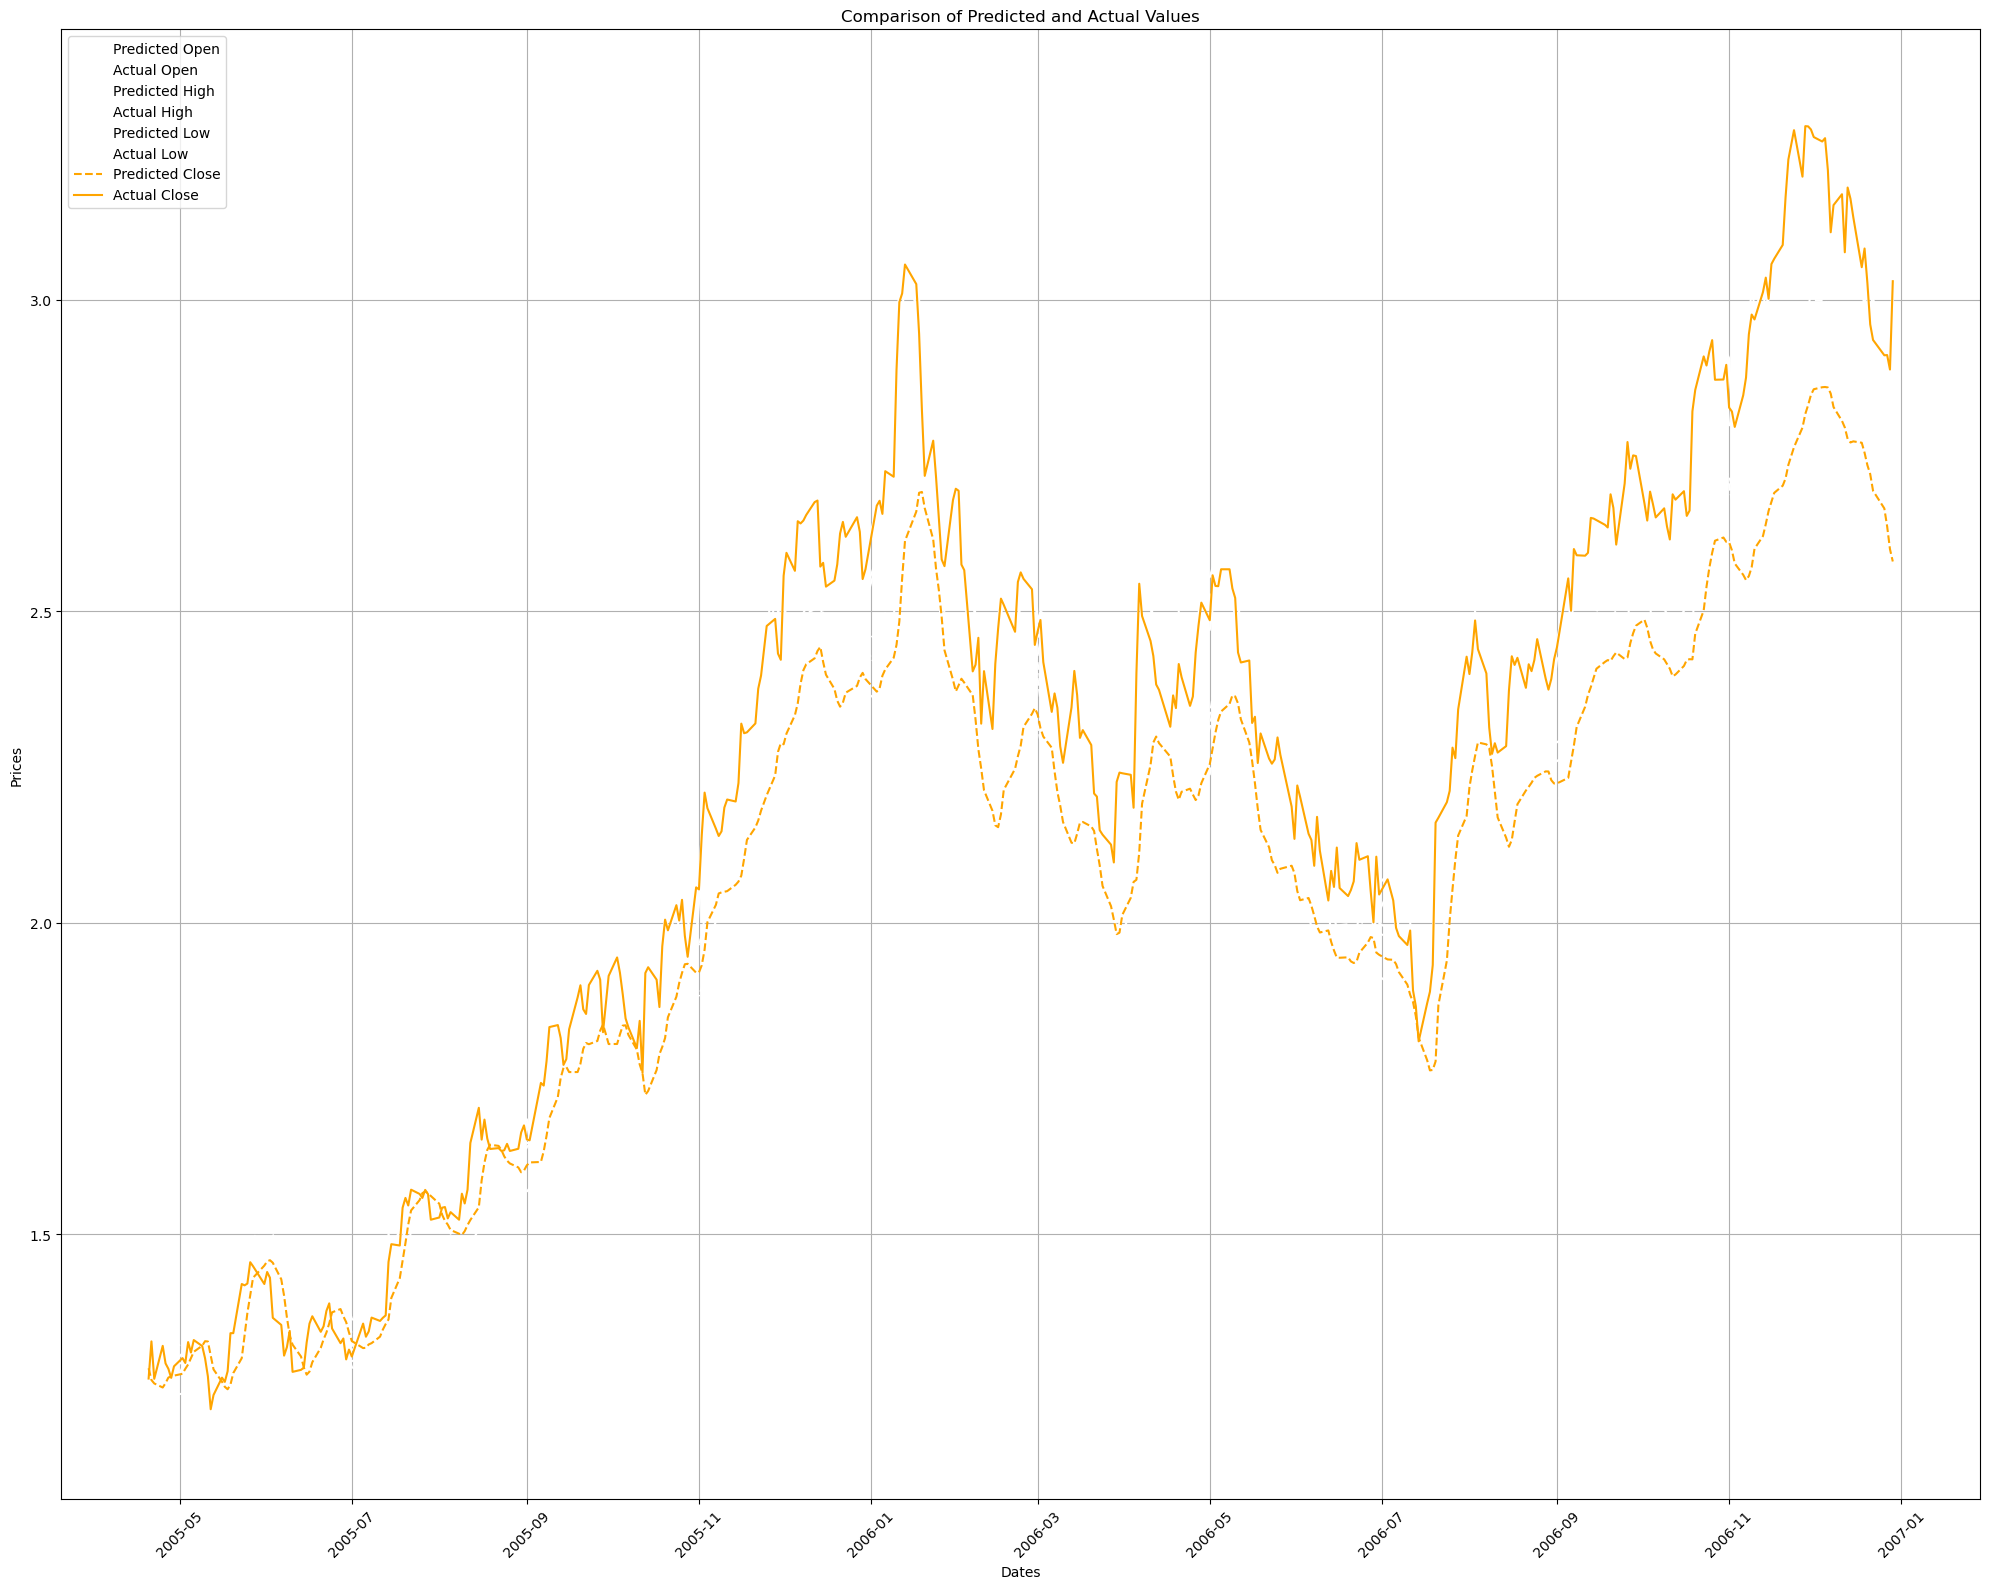

In [132]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test3, all_testdata_prediction_3[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test3, y_test3[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### **FROM 2011-01-03 -- 2024-06-25**

In [388]:
df

Open        High         Low       Close
Date                                                      
1980-12-12    0.128348    0.128906    0.128348    0.128348
1980-12-15    0.122210    0.122210    0.121652    0.121652
1980-12-16    0.113281    0.113281    0.112723    0.112723
1980-12-17    0.115513    0.116071    0.115513    0.115513
1980-12-18    0.118862    0.119420    0.118862    0.118862
...                ...         ...         ...         ...
2024-06-18  217.589996  218.630005  213.000000  214.289993
2024-06-20  213.929993  214.240005  208.850006  209.679993
2024-06-21  210.389999  211.889999  207.110001  207.490005
2024-06-24  207.720001  212.699997  206.589996  208.139999
2024-06-25  209.080002  211.380005  208.610001  210.169998

[10974 rows x 4 columns]

In [491]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling
scaler = MinMaxScaler()

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    X_open_scaled = scaler.fit_transform(X_open)
    X_high_scaled = scaler.fit_transform(X_high)
    X_low_scaled = scaler.fit_transform(X_low)
    X_close_scaled = scaler.fit_transform(X_close)

    Y_open_scaled = scaler.fit_transform(np.array(Y_open).reshape(-1, 1)).flatten()
    Y_high_scaled = scaler.fit_transform(np.array(Y_high).reshape(-1, 1)).flatten()
    Y_low_scaled = scaler.fit_transform(np.array(Y_low).reshape(-1, 1)).flatten()
    Y_close_scaled = scaler.fit_transform(np.array(Y_close).reshape(-1, 1)).flatten()

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open_scaled[:, i]
        ret_df[f'High-{n-i}'] = X_high_scaled[:, i]
        ret_df[f'Low-{n-i}'] = X_low_scaled[:, i]
        ret_df[f'Close-{n-i}'] = X_close_scaled[:, i]

    ret_df['Open-Target'] = Y_open_scaled
    ret_df['High-Target'] = Y_high_scaled
    ret_df['Low-Target'] = Y_low_scaled
    ret_df['Close-Target'] = Y_close_scaled

    return ret_df

# Example usage (assuming 'df' is your dataframe)
windowed_df = df_to_windowed_df(df, 
                                '2016-01-04', 
                                '2024-06-25', 
                                n=100)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3370358132.py:88: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close_scaled[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3370358132.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open_scaled[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3370358132.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

Target Date  Open-100  High-100   Low-100  Close-100   Open-99   High-99  \
0     2016-01-04  0.039611  0.037507  0.034157   0.032973  0.032090  0.033602   
1     2016-01-05  0.032090  0.033602  0.028861   0.035465  0.037090  0.034988   
2     2016-01-06  0.037090  0.034988  0.035890   0.035337  0.034640  0.034861   
3     2016-01-07  0.034640  0.034861  0.035131   0.036491  0.037090  0.036757   
4     2016-01-08  0.037090  0.036757  0.037264   0.038200  0.037645  0.036460   
...          ...       ...       ...       ...        ...       ...       ...   
2128  2024-06-18  0.984047  0.981042  0.977725   0.977553  0.978635  0.972496   
2129  2024-06-20  0.978635  0.972496  0.971025   0.967583  0.965759  0.958009   
2130  2024-06-21  0.965759  0.958009  0.957511   0.963652  0.959663  0.955745   
2131  2024-06-24  0.959663  0.955745  0.945428   0.942629  0.937443  0.929147   
2132  2024-06-25  0.937443  0.929147  0.927562   0.921891  0.920066  0.928298   

        Low-99  Close-99   Open-98  ...     Low-2   Close-2    Open-1  \
0     0.028861  0.035465  0.037090  ...  0.023225  0.021872  0.021798   
1     0.035890  0.035337  0.034640  ...  0.020130  0.019218  0.016159   
2     0.035131  0.036491  0.037090  ...  0.016432  0.019334  0.020183   
3     0.037264  0.038200  0.037645  ...  0.016970  0.015934  0.013532   
4     0.037994  0.037260  0.037175  ...  0.013639  0.013345  0.011123   
...        ...       ...       ...  ...       ...       ...       ...   
2128  0.971025  0.967583  0.965759  ...  0.991082  0.978463  0.978369   
2129  0.957511  0.963652  0.959663  ...  0.998531  1.000000  1.000000   
2130  0.945428  0.942629  0.937443  ...  1.000000  0.987737  0.981239   
2131  0.927562  0.921891  0.920066  ...  0.978230  0.963985  0.963094   
2132  0.924527  0.935907  0.896536  ...  0.969103  0.952701  0.949408   

        High-1     Low-1   Close-1  Open-Target  High-Target  Low-Target  \
0     0.019464  0.020130  0.019218     0.016159     0.017361    0.016432   
1     0.017361  0.016432  0.019334     0.020183     0.017969    0.016970   
2     0.017969  0.016970  0.015934     0.013532     0.013559    0.013639   
3     0.013559  0.013639  0.013345     0.011123     0.010721    0.009128   
4     0.010721  0.009128  0.007870     0.010956     0.009428    0.009560   
...        ...       ...       ...          ...          ...         ...   
2128  0.993664  0.998531  1.000000     1.000000     0.992042    1.000000   
2129  0.992042  1.000000  0.987737     0.981239     0.969790    0.978230   
2130  0.969790  0.978230  0.963985     0.963094     0.957878    0.969103   
2131  0.957878  0.969103  0.952701     0.949408     0.961983    0.966375   
2132  0.961983  0.966375  0.956050     0.956379     0.955293    0.976971   

      Close-Target  
0         0.019334  
1         0.015934  
2         0.013345  
3         0.007870  
4         0.008527  
...            ...  
2128      0.987737  
2129      0.963985  
2130      0.952701  
2131      0.956050  
2132      0.966510  

[2133 rows x 405 columns]

In [515]:
## WINDOW FUNCTION
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: 1990-01-02 -- 2006-12-29
windowed_df = df_to_windowed_df(df, 
                                '2016-01-04', 
                                '2024-06-25',
                                n=50)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3853324454.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3853324454.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_14200\3853324454.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Target Date     Open-50     High-50      Low-50    Close-50     Open-49  \
0     2016-01-04   28.500000   28.895000   28.424999   28.440001   28.582500   
1     2016-01-05   28.582500   28.875000   28.525000   28.875000   29.174999   
2     2016-01-06   29.174999   29.807501   29.082500   29.770000   29.520000   
3     2016-01-07   29.520000   29.532499   28.730000   28.820000   28.850000   
4     2016-01-08   28.850000   29.135000   28.497499   28.637501   29.232500   
...          ...         ...         ...         ...         ...         ...   
2128  2024-06-18  169.029999  169.199997  168.240005  168.449997  168.699997   
2129  2024-06-20  168.699997  170.080002  168.350006  169.669998  168.800003   
2130  2024-06-21  168.800003  169.089996  167.110001  167.779999  168.339996   
2131  2024-06-24  168.339996  175.460007  168.160004  175.039993  174.259995   
2132  2024-06-25  174.259995  178.360001  174.210007  176.550003  175.360001   

         High-49      Low-49    Close-49     Open-48  ...       Low-2  \
0      28.875000   28.525000   28.875000   29.174999  ...   26.795000   
1      29.807501   29.082500   29.770000   29.520000  ...   26.205000   
2      29.532499   28.730000   28.820000   28.850000  ...   25.500000   
3      29.135000   28.497499   28.637501   29.232500  ...   25.602501   
4      29.825001   29.014999   29.817499   29.674999  ...   24.967501   
...          ...         ...         ...         ...  ...         ...   
2128  170.080002  168.350006  169.669998  168.800003  ...  211.300003   
2129  169.089996  167.110001  167.779999  168.339996  ...  212.720001   
2130  175.460007  168.160004  175.039993  174.259995  ...  213.000000   
2131  178.360001  174.210007  176.550003  175.360001  ...  208.850006   
2132  176.630005  172.500000  172.690002  171.750000  ...  207.110001   

         Close-2      Open-1      High-1       Low-1     Close-1  Open-Target  \
0      26.830000   26.752501   26.757500   26.205000   26.315001    25.652500   
1      26.315001   25.652500   26.342501   25.500000   26.337500    26.437500   
2      26.337500   26.437500   26.462500   25.602501   25.677500    25.139999   
3      25.677500   25.139999   25.592501   24.967501   25.174999    24.670000   
4      25.174999   24.670000   25.032499   24.107500   24.112499    24.637501   
...          ...         ...         ...         ...         ...          ...   
2128  212.490005  213.369995  218.949997  212.720001  216.669998   217.589996   
2129  216.669998  217.589996  218.630005  213.000000  214.289993   213.929993   
2130  214.289993  213.929993  214.240005  208.850006  209.679993   210.389999   
2131  209.679993  210.389999  211.889999  207.110001  207.490005   207.720001   
2132  207.490005  207.720001  212.699997  206.589996  208.139999   209.080002   

      High-Target  Low-Target  Close-Target  
0       26.342501   25.500000     26.337500  
1       26.462500   25.602501     25.677500  
2       25.592501   24.967501     25.174999  
3       25.032499   24.107500     24.112499  
4       24.777500   24.190001     24.240000  
...           ...         ...           ...  
2128   218.630005  213.000000    214.289993  
2129   214.240005  208.850006    209.679993  
2130   211.889999  207.110001    207.490005  
2131   212.699997  206.589996    208.139999  
2132   211.380005  208.610001    210.169998  

[2133 rows x 205 columns]

In [516]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2133,), (2133, 50, 4), (2133, 4))

In [517]:
print(X,'\n')
print(y)

[[[ 28.5     28.895   28.425   28.44  ]
  [ 28.5825  28.875   28.525   28.875 ]
  [ 29.175   29.8075  29.0825  29.77  ]
  ...
  [ 26.74    27.3575  26.715   27.185 ]
  [ 27.145   27.175   26.795   26.83  ]
  [ 26.7525  26.7575  26.205   26.315 ]]

 [[ 28.5825  28.875   28.525   28.875 ]
  [ 29.175   29.8075  29.0825  29.77  ]
  [ 29.52    29.5325  28.73    28.82  ]
  ...
  [ 27.145   27.175   26.795   26.83  ]
  [ 26.7525  26.7575  26.205   26.315 ]
  [ 25.6525  26.3425  25.5     26.3375]]

 [[ 29.175   29.8075  29.0825  29.77  ]
  [ 29.52    29.5325  28.73    28.82  ]
  [ 28.85    29.135   28.4975  28.6375]
  ...
  [ 26.7525  26.7575  26.205   26.315 ]
  [ 25.6525  26.3425  25.5     26.3375]
  [ 26.4375  26.4625  25.6025  25.6775]]

 ...

 [[168.8    169.09   167.11   167.78  ]
  [168.34   175.46   168.16   175.04  ]
  [174.26   178.36   174.21   176.55  ]
  ...
  [213.37   218.95   212.72   216.67  ]
  [217.59   218.63   213.     214.29  ]
  [213.93   214.24   208.85   209.68  ]]

 [

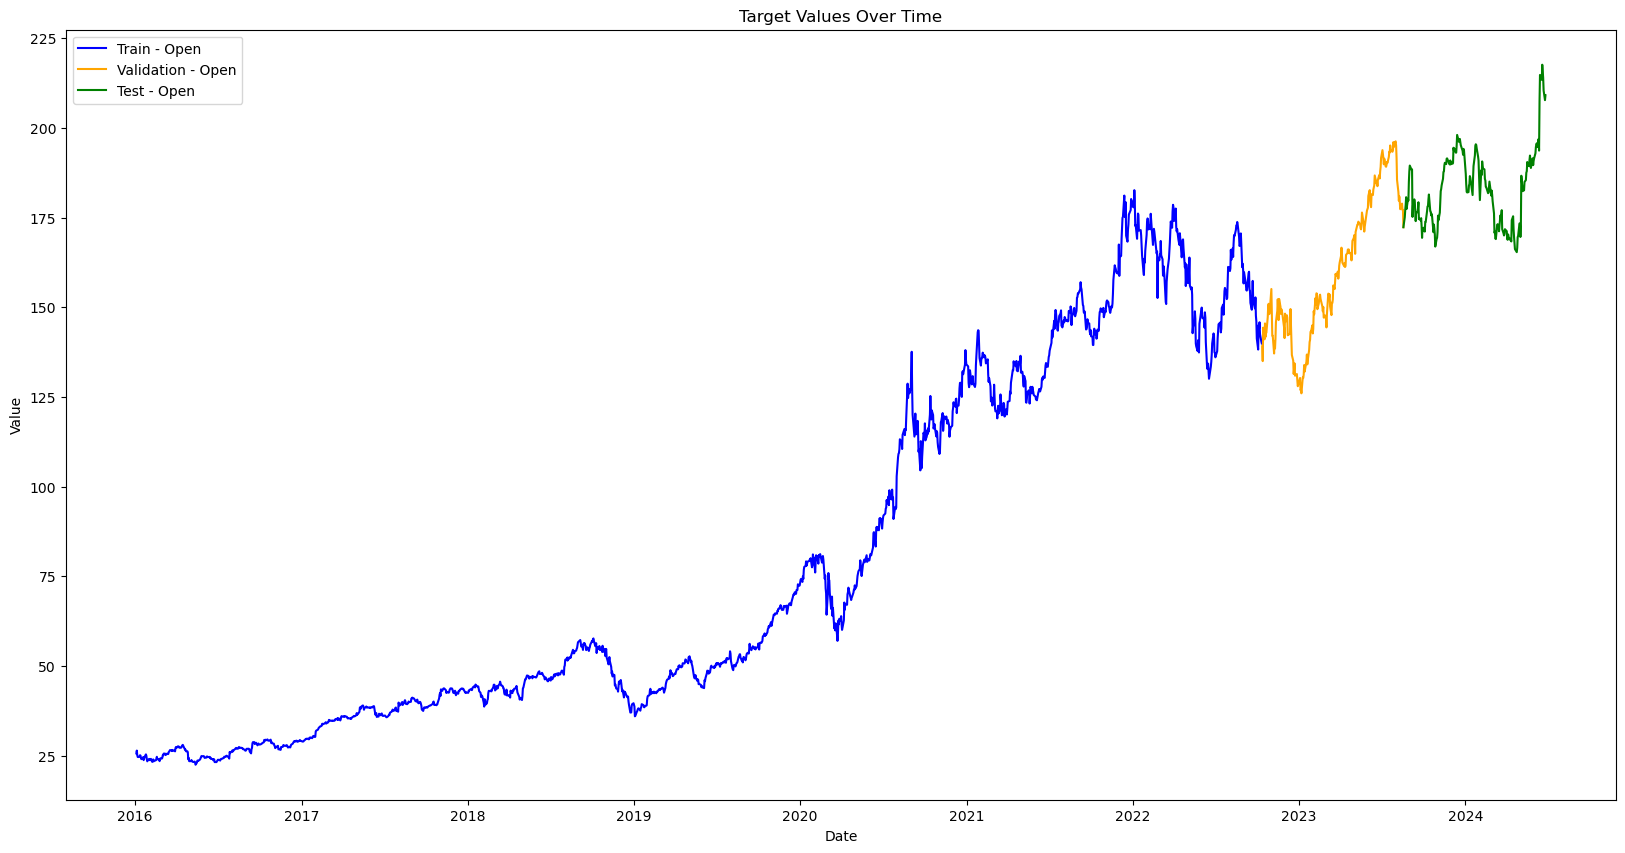

In [518]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train2, X_train2, y_train2 = dates[:q_80], X[:q_80], y[:q_80]
dates_val2, X_val2, y_val2 = dates[q_80:q_90+1], X[q_80:q_90+1], y[q_80:q_90+1]
dates_test2, X_test2, y_test2 = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(20, 10))

# Plotting target values for each feature set
plt.plot(dates_train2, y_train2[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val2, y_val2[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test2, y_test2[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [519]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model_2 = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model_2.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model_2.fit(X_train2, y_train2, 
          validation_data=(X_val2, y_val2), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 8354.0830 - mean_absolute_error: 77.2716 - val_loss: 25603.5234 - val_mean_absolute_error: 158.8328
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 8003.6099 - mean_absolute_error: 74.5772 - val_loss: 24628.0566 - val_mean_absolute_error: 155.7037
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 7570.1538 - mean_absolute_error: 71.1375 - val_loss: 22418.0098 - val_mean_absolute_error: 148.3099
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 6081.3022 - mean_absolute_error: 59.8697 - val_loss: 19017.8789 - val_mean_absolute_error: 136.0694
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 5048.9951 - mean_absolute_error: 52.1083 - val_loss: 15768.4814 - val_mean_absolute_error: 123.2147
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 3884.8936 - mean_absolute_error: 44.1766 - val_loss: 12839.8799 - val_mean_absolute_error: 110.3664
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━

In [520]:
X_test2.shape

(214, 50, 4)

In [521]:
all_testdata_prediction_2 = model_2.predict(X_test2)

# # Inverse transform the predictions and the actual values
# all_testdata_prediction_2_original = scaler.inverse_transform(all_testdata_prediction_2)
# y_test2_original = scaler.inverse_transform(y_test2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step


In [522]:
all_testdata_prediction_2.shape

(214, 4)

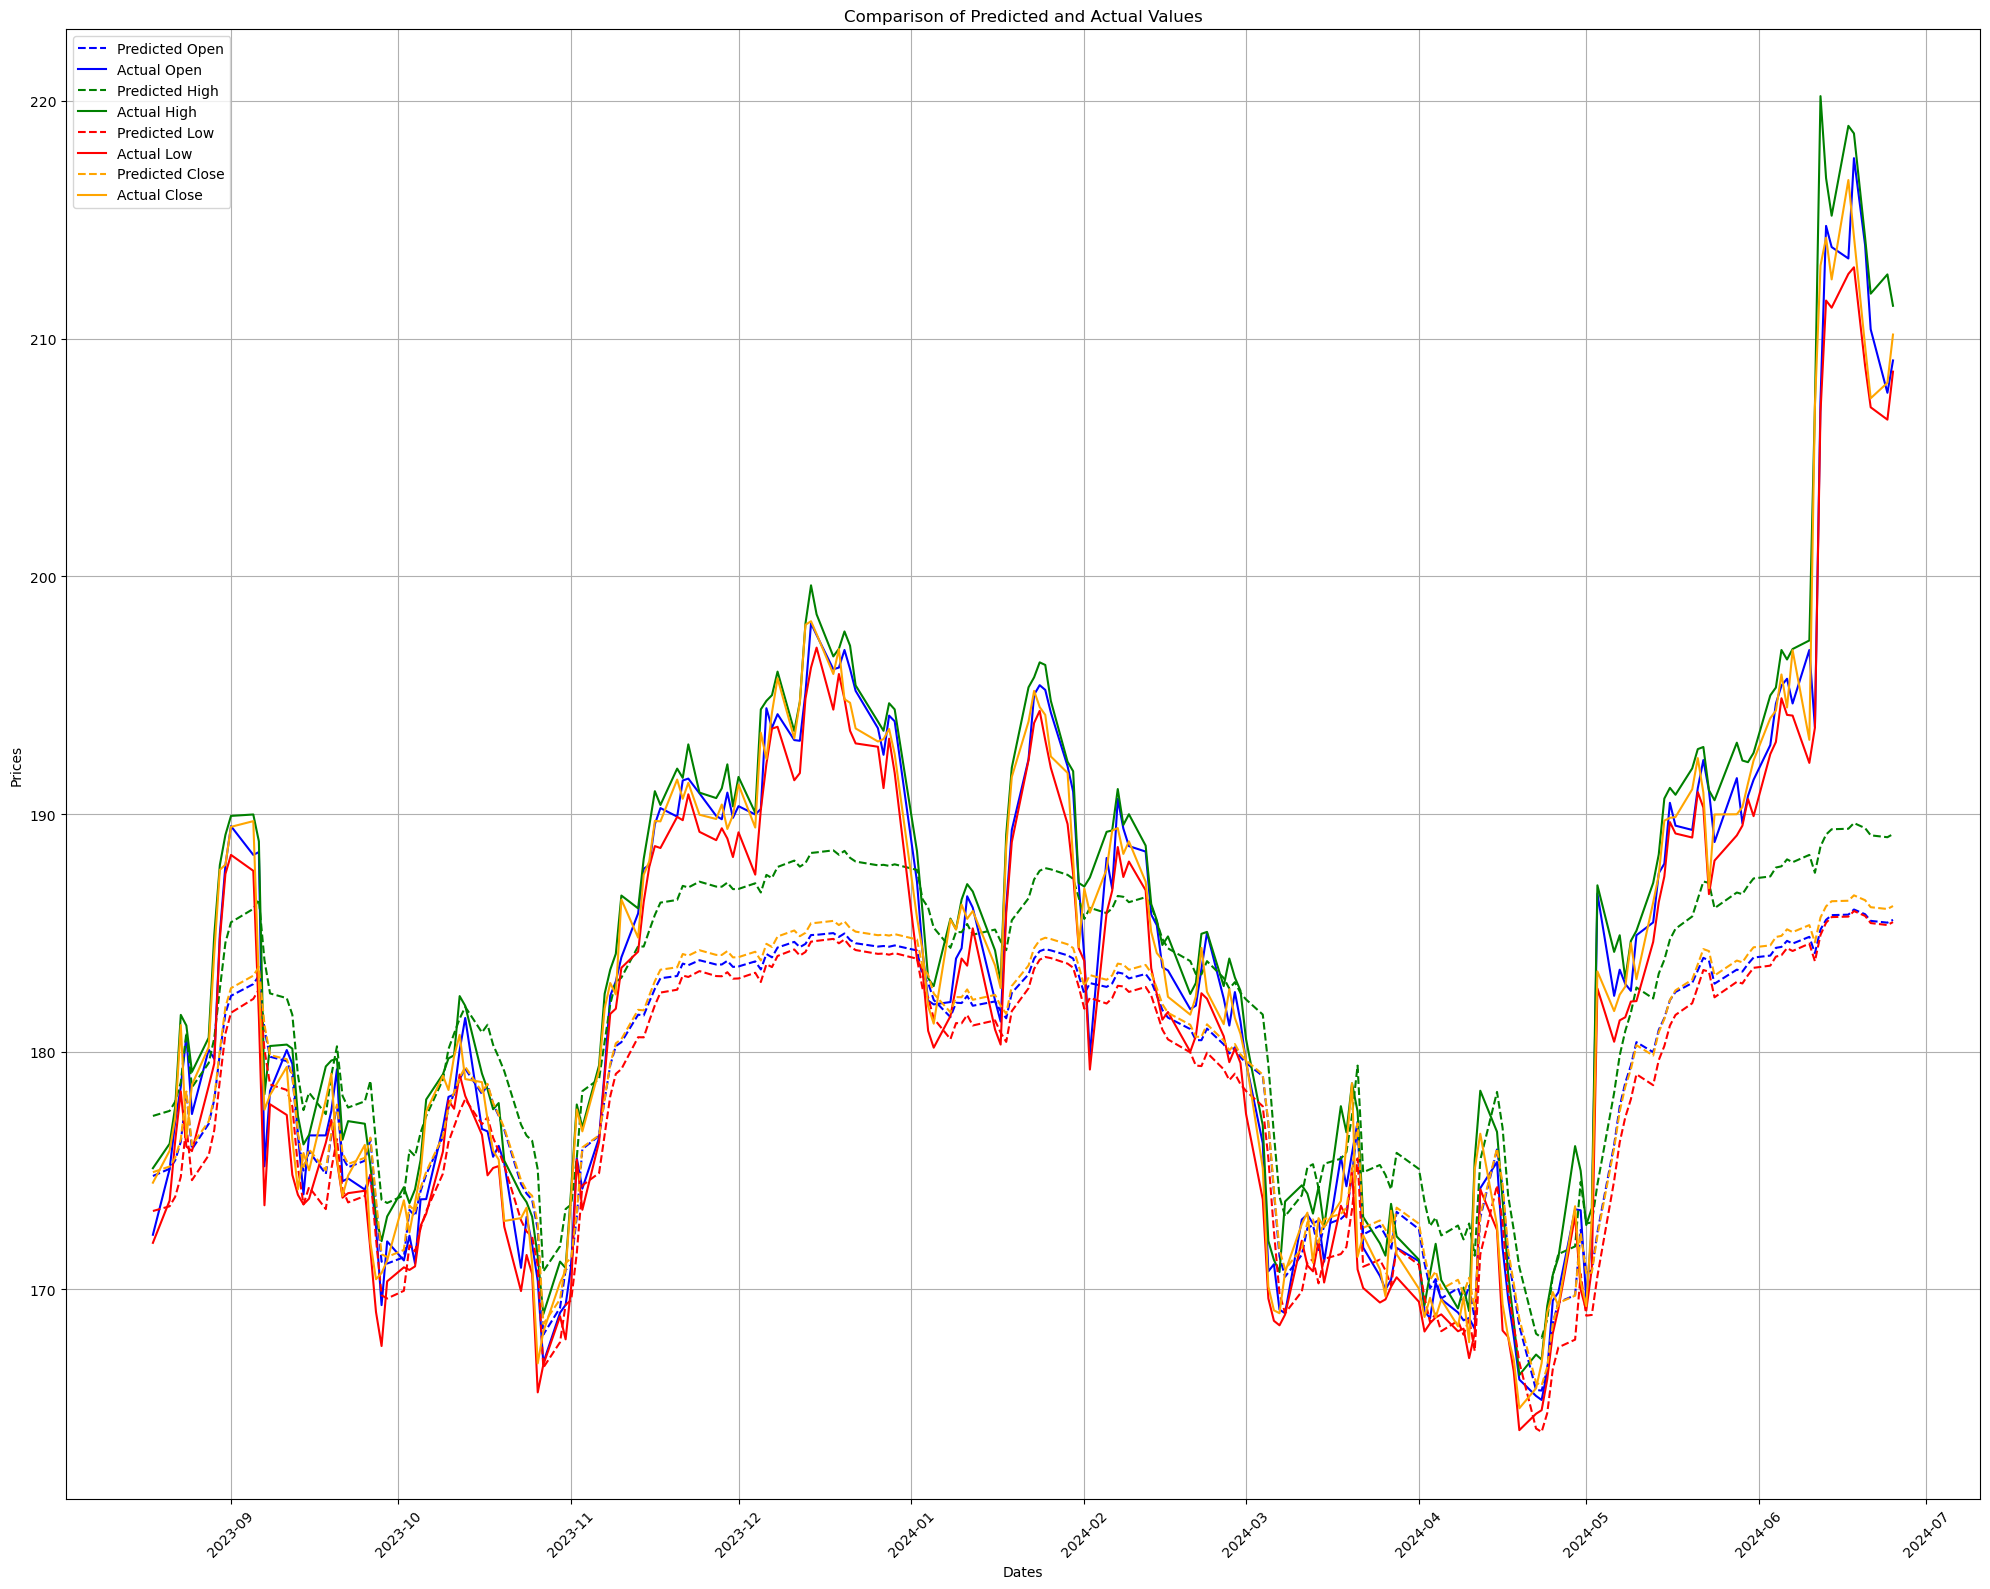

In [523]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test2, all_testdata_prediction_2[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test2, y_test2[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

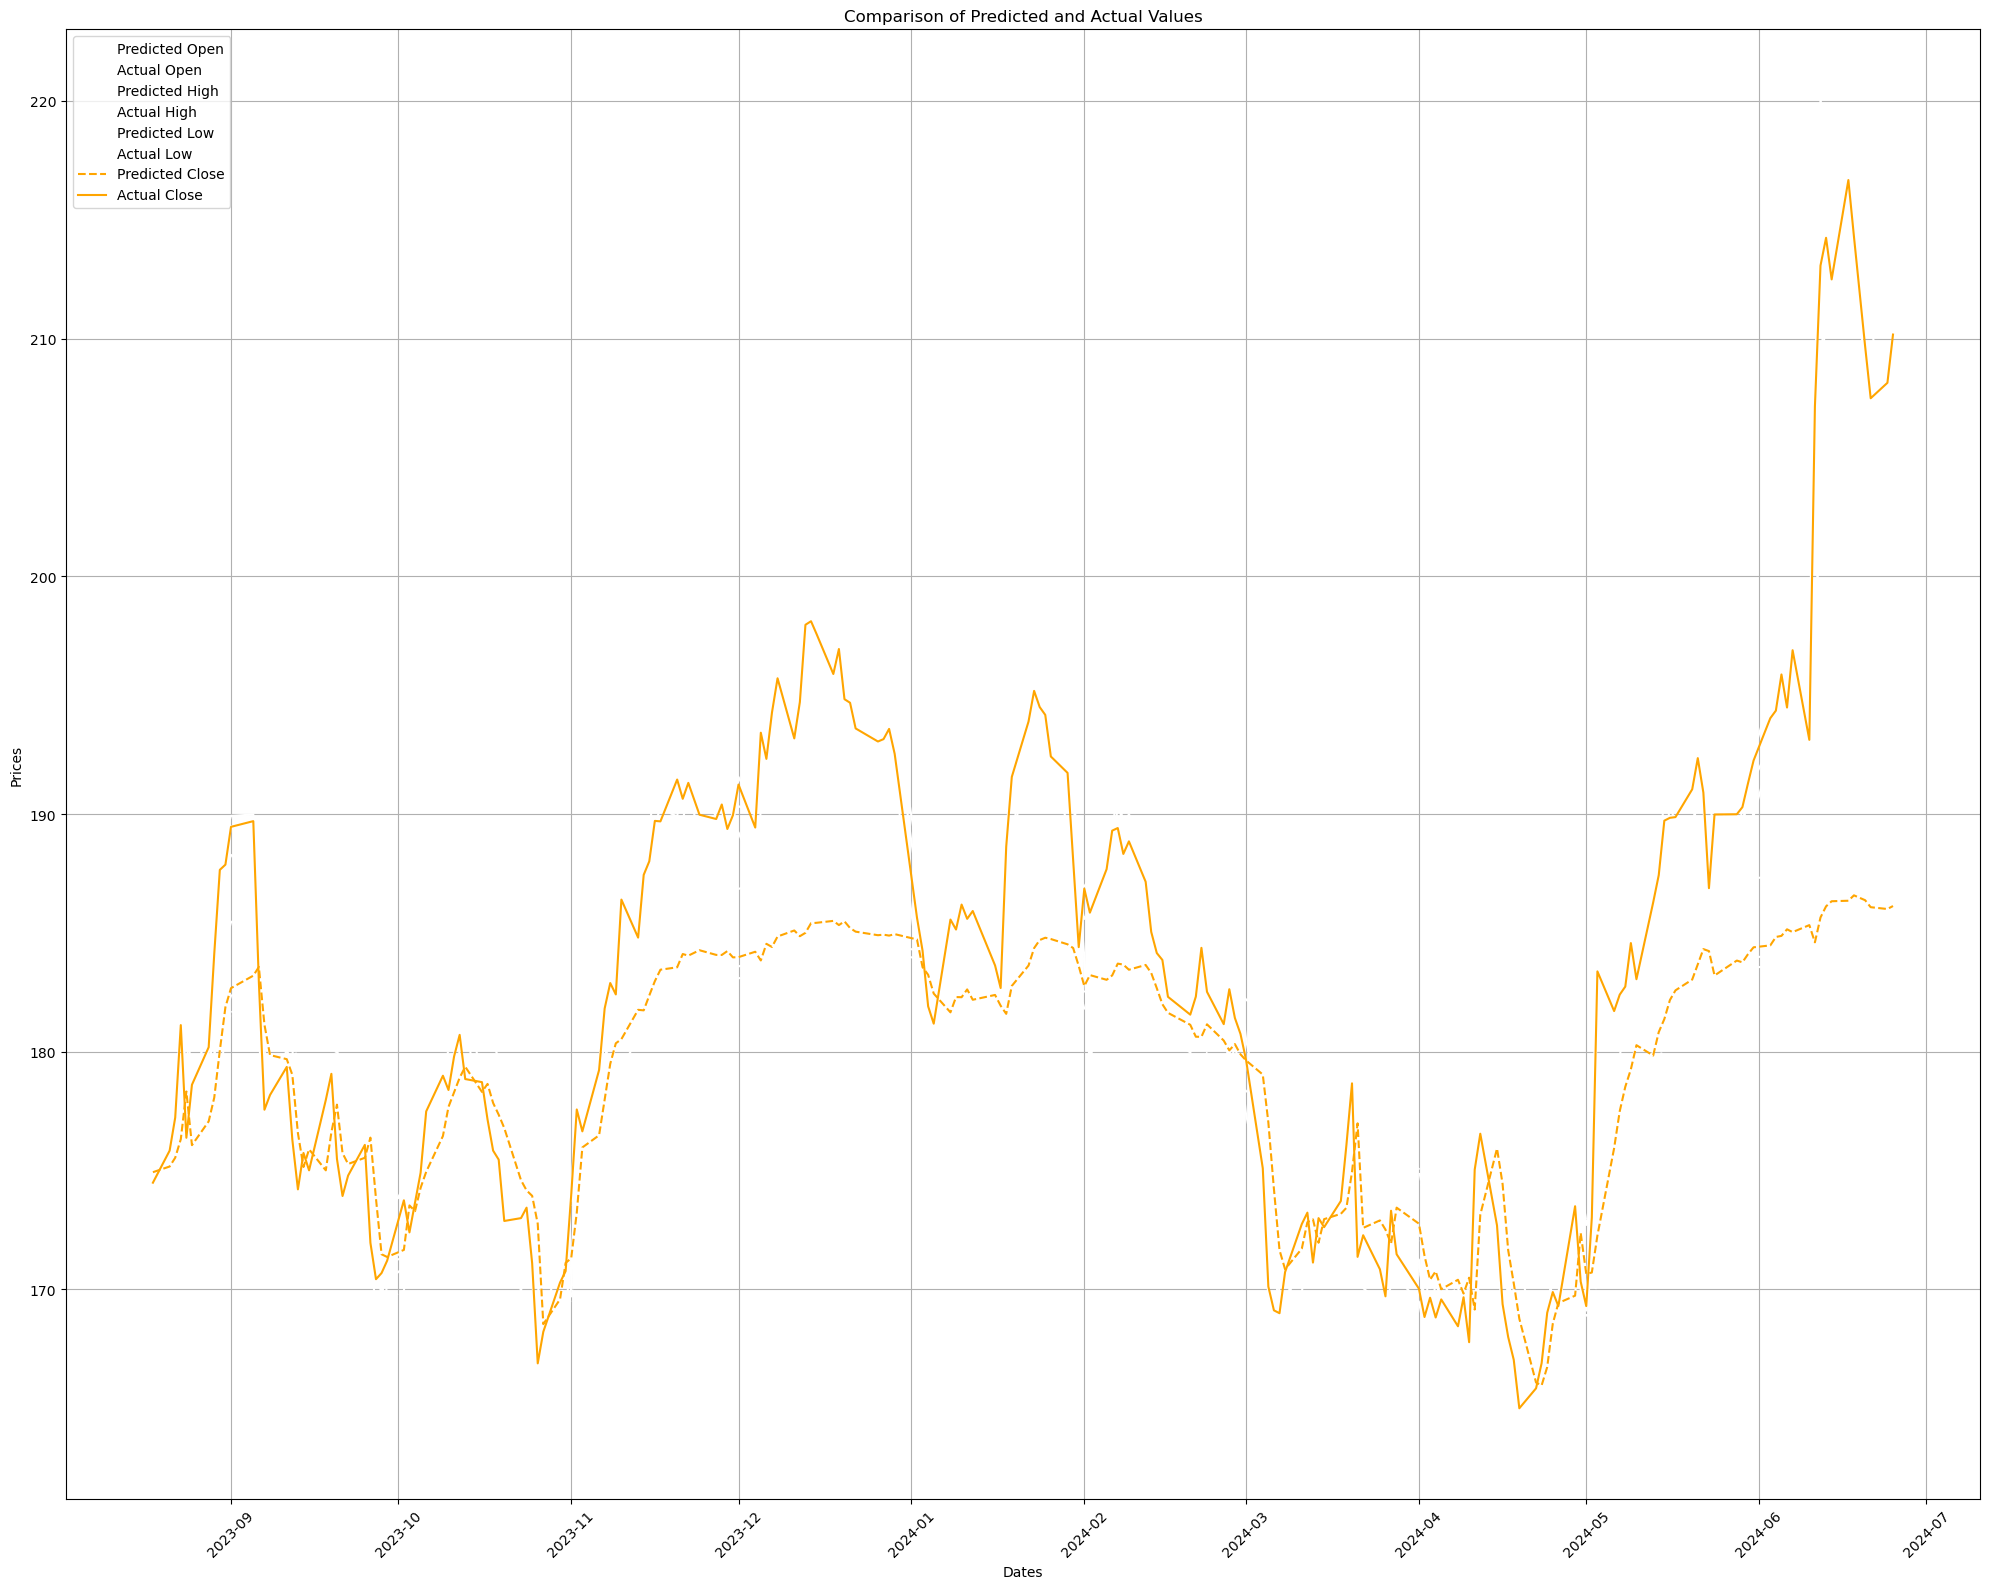

In [524]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test2, all_testdata_prediction_2[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test2, y_test2[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#### **Iterative Predictions**

In [548]:
import pandas as pd
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Convert the start date string to a datetime object using str_to_datetime
start_date_str = '2024-06-26'
start_date = str_to_datetime(start_date_str)

# Create a range of business days for the next 30 weekdays
dates_set_future_prediction = pd.date_range(start=start_date, periods=30, freq=pd.offsets.BDay())

# Print the array of timestamps
print(dates_set_future_prediction.shape)
dates_set_future_prediction

(30,)


DatetimeIndex(['2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
               '2024-08-05', '2024-08-06'],
              dtype='datetime64[ns]', freq='B')

In [549]:
print(X_val2.shape)

(214, 50, 4)


In [550]:
# Initialize the input window with the last 50 days from X_val
input_window = X_test2[-50:, :, :]  # Shape (50, 50, 4)
print(input_window.shape)
print(input_window)

(50, 50, 4)
[[[183.99 186.95 183.82 186.86]
  [179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  ...
  [168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]]

 [[179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  ...
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]]

 [[188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  [190.64 191.05 188.61 189.41]
  ...
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  [171.75 173.76 168.27 169.38]]

 ...

 [[168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  ...
  [213.37 218.95 212.72 216.67]
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]]

 [[168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  ...
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]
  [210.39 211.89

In [551]:
import numpy as np

# Initialize an empty numpy array to store predictions
test_set_future_prediction = np.empty((0, 4))
test_set_future_prediction

array([], shape=(0, 4), dtype=float64)

In [552]:
# Iterate over each date in the dates_set_future_prediction
for date in dates_set_future_prediction:
    # Ensure the input window has the shape (1, 50, 4) for the model
    current_input = input_window
    
    # Predict the next day's 'open', 'high', 'low', 'close'
    prediction = model_2.predict(current_input)
    print('tsfp', test_set_future_prediction.shape)
    print('p', prediction.shape)
    # Append the prediction to the numpy array
    test_set_future_prediction_1 = np.append(test_set_future_prediction, prediction, axis=0)
    print(test_set_future_prediction_1.shape)
    
    # Append the prediction to the input window and drop the oldest day
    input_window = np.append(input_window[1:], [prediction], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
tsfp (0, 4)
p (50, 4)
(50, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
tsfp (0, 4

In [553]:
print(len(test_set_future_prediction_1))
print(test_set_future_prediction_1)
print(test_set_future_prediction_1.shape)

50
[[182.86209106 186.03823853 182.28900146 183.20739746]
 [183.45455933 186.69773865 182.93867493 183.83473206]
 [183.37091064 186.62765503 182.87121582 183.76040649]
 [183.69281006 186.98654175 183.22402954 184.10386658]
 [183.96174622 187.28816223 183.52906799 184.39215088]
 [184.04397583 187.37358093 183.62062073 184.47360229]
 [184.36947632 187.74757385 184.00018311 184.82691956]
 [184.40927124 187.79948425 184.05986023 184.87332153]
 [184.66421509 188.09237671 184.35690308 185.1494751 ]
 [184.54940796 187.9712677  184.23742676 185.0317688 ]
 [184.83258057 188.28018188 184.54888916 185.32594299]
 [184.14352417 187.52775574 183.80502319 184.60166931]
 [185.13981628 188.63299561 184.91259766 185.64797974]
 [185.54876709 189.13587952 185.42724609 186.11639404]
 [185.74583435 189.358078   185.6633606  186.33049011]
 [185.76602173 189.38020325 185.68408203 186.35166931]
 [185.98239136 189.61875916 185.91842651 186.57867432]
 [185.78292847 189.40707397 185.71316528 186.37385559]
 [185.5

In [554]:
test_set_future_prediction_1.shape

(50, 4)

In [555]:
dates_set_future_prediction.shape

(30,)

In [509]:
test_set_future_prediction_original = scaler.inverse_transform(test_set_future_prediction_1)

In [539]:
test_set_future_prediction_original

array([[170.46852983, 168.96118313, 171.82046709, 170.815014  ],
       [171.26909556, 169.75636957, 172.65079823, 171.63510714],
       [172.04880353, 170.54356226, 173.44098714, 172.43206354],
       [172.7512695 , 171.22857157, 174.13916125, 173.12926591],
       [173.05055474, 171.46069086, 174.37102604, 173.35872448],
       [173.14673414, 171.49399619, 174.3864351 , 173.37877246],
       [173.09321887, 171.39803659, 174.26060597, 173.25508347],
       [172.93507929, 171.19962752, 174.01938237, 173.02818151],
       [173.31260139, 171.59814621, 174.42656577, 173.42862055],
       [174.06005675, 172.37994804, 175.26952956, 174.23944742],
       [174.17655021, 172.49627955, 175.34862249, 174.3358582 ],
       [173.78438255, 172.01065105, 174.83858474, 173.83762018],
       [173.20206564, 171.36869921, 174.13327295, 173.16397101],
       [173.05913846, 171.21260722, 173.97701901, 173.01029682],
       [173.36394181, 171.57713805, 174.35373133, 173.38404763],
       [174.42152196, 172

In [559]:
test_set_future_prediction_1.shape

(30, 4)

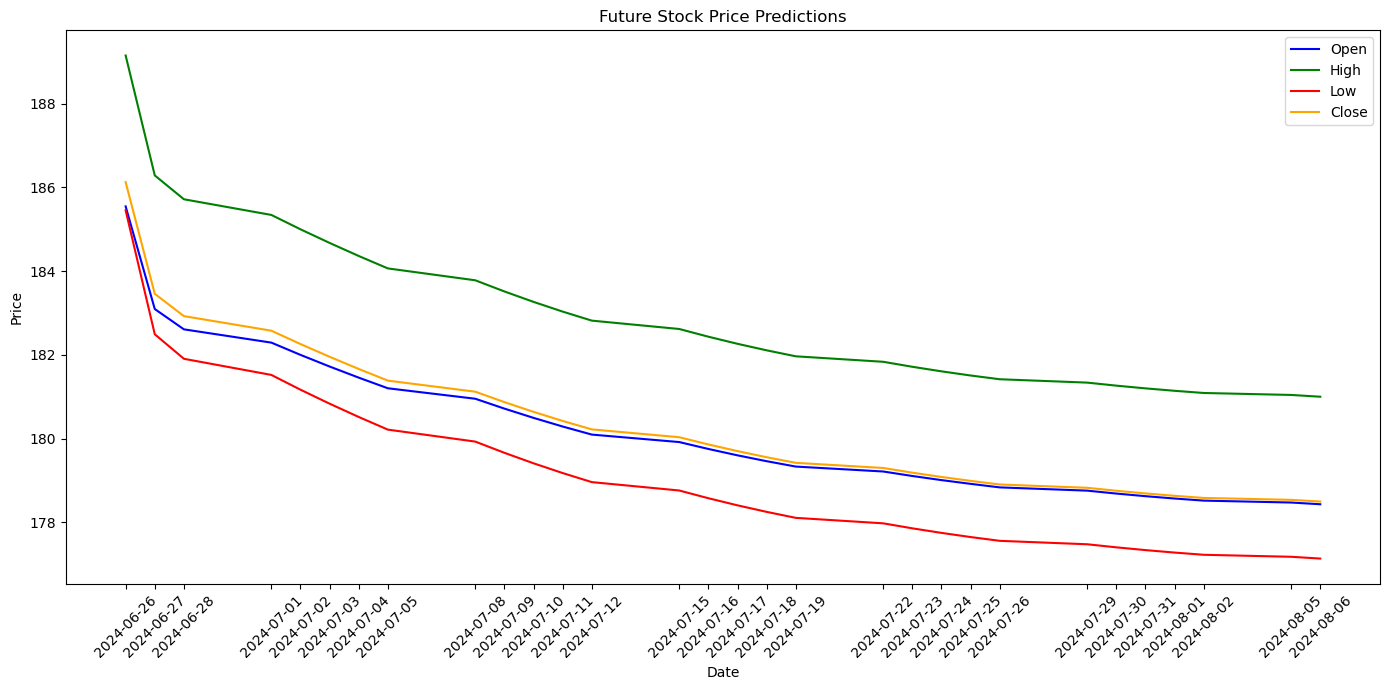

In [560]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation (if not already converted)
# test_set_future_prediction = np.array(test_set_future_prediction)

# Extract the first 30 rows for matching the dates length
test_set_future_prediction_1 = test_set_future_prediction_1[:30, :]

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction_1[:, 0]
high_prices = test_set_future_prediction_1[:, 1]
low_prices = test_set_future_prediction_1[:, 2]
close_prices = test_set_future_prediction_1[:, 3]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(dates_set_future_prediction, open_prices, label='Open', color='blue')
plt.plot(dates_set_future_prediction, high_prices, label='High', color='green')
plt.plot(dates_set_future_prediction, low_prices, label='Low', color='red')
plt.plot(dates_set_future_prediction, close_prices, label='Close', color='orange')

# Adding title and labels
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Displaying all the dates on x-axis
plt.xticks(dates_set_future_prediction, rotation=45)
plt.tight_layout()

plt.show()

In [514]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation
test_set_future_prediction = np.array(test_set_future_prediction)

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction_original[:, 0]
high_prices = test_set_future_prediction_original[:, 1]
low_prices = test_set_future_prediction_original[:, 2]
close_prices = test_set_future_prediction_original[:, 3]

# Prepare data for tabulation
data = []
for i in range(len(dates_set_future_prediction)):
    data.append([
        dates_set_future_prediction[i],
        open_prices[i],
        high_prices[i],
        low_prices[i],
        close_prices[i]
    ])

# Define headers
headers = ["Date", "Predicted Open", "Predicted High", "Predicted Low", "Predicted Close"]

# Generate table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+---------------------+------------------+------------------+-----------------+-------------------+
| Date                |   Predicted Open |   Predicted High |   Predicted Low |   Predicted Close |
+=====================+==================+==================+=================+===================+
| 2024-06-26 00:00:00 |          170.469 |          168.961 |         171.82  |           170.815 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-06-27 00:00:00 |          171.269 |          169.756 |         172.651 |           171.635 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-06-28 00:00:00 |          172.049 |          170.544 |         173.441 |           172.432 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-07-01 00:00:00 |          172.751 |          171.229 |         174.139 |           173.129 |


In [563]:
import pandas as pd
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Convert the start date string to a datetime object using str_to_datetime
start_date_str = '2024-06-26'
start_date = str_to_datetime(start_date_str)

# Create a range of business days for the next 30 weekdays
dates_set_future_prediction = pd.date_range(start=start_date, periods=30, freq=pd.offsets.BDay())

# Print the array of timestamps
print(dates_set_future_prediction.shape)
dates_set_future_prediction

(30,)


DatetimeIndex(['2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
               '2024-08-05', '2024-08-06'],
              dtype='datetime64[ns]', freq='B')

In [564]:
# Initialize the input window with the last 50 days from X_val
input_window = X_test2[-50:, :, :]  # Shape (50, 50, 4)
print(input_window.shape)
print(input_window)

# Initialize an empty list to store the predictions
test_set_future_prediction = []

(50, 50, 4)
[[[183.99 186.95 183.82 186.86]
  [179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  ...
  [168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]]

 [[179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  ...
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]]

 [[188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  [190.64 191.05 188.61 189.41]
  ...
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  [171.75 173.76 168.27 169.38]]

 ...

 [[168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  ...
  [213.37 218.95 212.72 216.67]
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]]

 [[168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  ...
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]
  [210.39 211.89

In [565]:
# Iterate over each date in the dates_set_future_prediction
for date in dates_set_future_prediction:
    # Ensure the input window has the shape (1, 50, 4) for the model
    current_input = input_window
    
    # Predict the next day's 'open', 'high', 'low', 'close'
    prediction = model_2.predict(current_input)
    
    # Store the prediction
    test_set_future_prediction.append(prediction[0])
    
    # Append the prediction to the input window and drop the oldest day
    input_window = np.append(input_window[1:], [prediction], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/

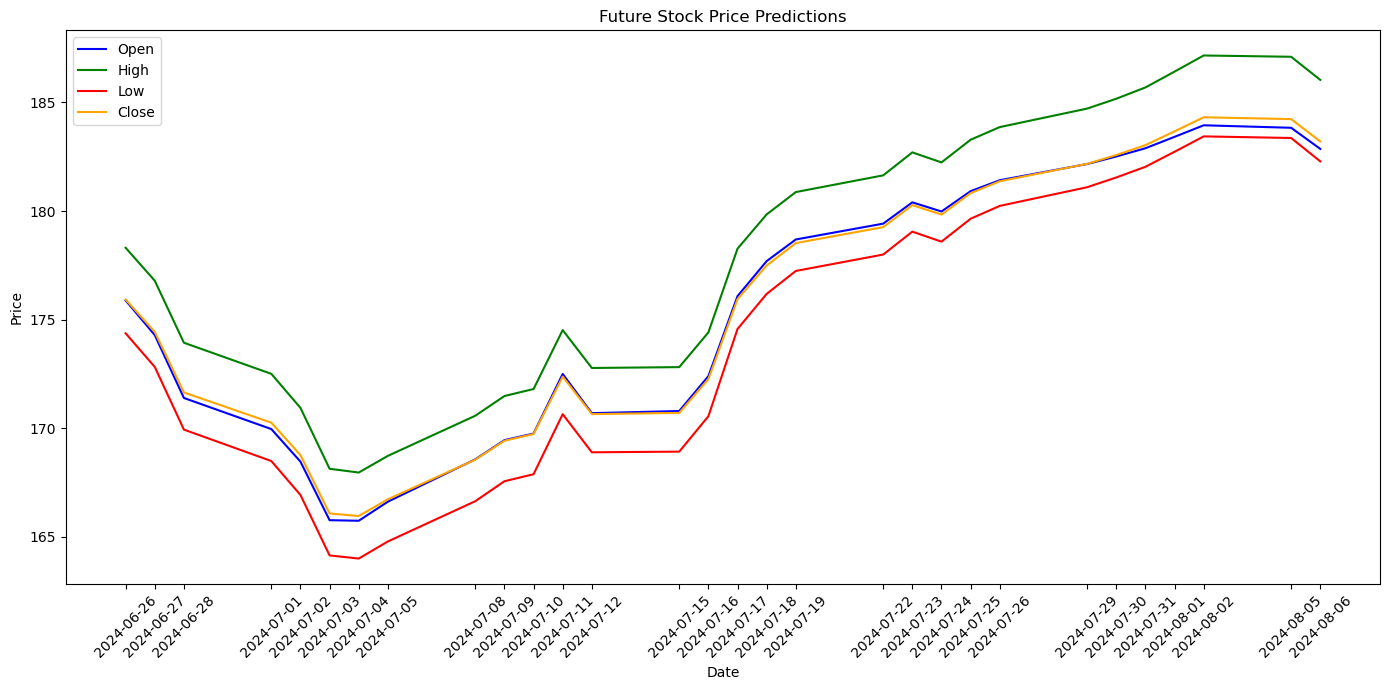

In [566]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation
test_set_future_prediction = np.array(test_set_future_prediction)

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction[:, 0]
high_prices = test_set_future_prediction[:, 1]
low_prices = test_set_future_prediction[:, 2]
close_prices = test_set_future_prediction[:, 3]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(dates_set_future_prediction, open_prices, label='Open', color='blue')
plt.plot(dates_set_future_prediction, high_prices, label='High', color='green')
plt.plot(dates_set_future_prediction, low_prices, label='Low', color='red')
plt.plot(dates_set_future_prediction, close_prices, label='Close', color='orange')

# Adding title and labels
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Displaying all the dates on x-axis
plt.xticks(dates_set_future_prediction, rotation=45)
plt.tight_layout()

plt.show()